# Classification Model

 I am going to Build a model that Classifies the Side Effects of a Drug

# Importing Libraries

In [1]:
#Loading
import pandas as pd
import numpy as np

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#To ignore warning
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_csv('data.csv') 
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Feature Description

1. Drug (categorical): name of drug
2. DrugId (numerical): drug id
3. Condition (categorical): name of condition
4. Review (text): patient review
5. Side (text): side effects associated with drug (if any)
6. EaseOfUse (numerical): 5 star rating
7. Effectiveness (numerical): 5 star rating
8. Satisfaction (numerical): 5 star rating
9. Date (date): date of review entry
10. UsefulCount (numerical): number of users who found review useful.
11. Age (numerical): age group range of user
12. Sex (categorical): gender of user

# About the dataset

In [3]:
data.shape

(362806, 12)

Dataset have 362806 rows and 12 columns

In [4]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [5]:
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [9]:
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       ' ', '13-18', '7-12', '0-2', '3-6'], dtype=object)

In [10]:
data['Condition'].unique()

array(['Stuffy Nose', 'Cold Symptoms', 'Other', ...,
       'Combative and Explosive Behavior', 'Lead Poisoning',
       'Poisoning from Swallowed Unknown Substance'], dtype=object)

In [11]:
data['Date'].unique()

array(['9/21/2014', '1/13/2011', '7/16/2012', ..., '10/25/2019',
       '6/22/2019', '10/19/2019'], dtype=object)

In [12]:
data['Drug'].unique()

array(['25dph-7.5peh', 'warfarin (bulk) 100 % powder', 'wymzya fe', ...,
       'chest congestion relief dm', 'chantix', 'chateal'], dtype=object)

In [13]:
data['DrugId'].unique()

array([146724, 144731, 163180, ...,  94947, 144470, 163265], dtype=int64)

In [14]:
data['EaseofUse'].unique()

array([ 5,  2,  1,  4,  3,  6, 10], dtype=int64)

In [15]:
data['Effectiveness'].unique()

array([ 5,  3,  2,  1,  4,  6, 10], dtype=int64)

In [16]:
data['Reviews'].unique()

array(["I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.",
       'cleared me right up even with my throat hurting it went away after taking the medicine',
       'why did my PTINR go from a normal of 2.5 to over \n100?', ...,
       "As long as I was on chantix, I didn't smoke.  Terrible stomach upset after each dose, constipation, headaches constantly, crazy dreams and mood swings.  I have had to stop taking it and have found other ways to stop smoking.",
       "Started this medication Oct 5th 2008. Haven't smoked for 6 weeks and planning on the full 12 weeks program.  I have had some problems like getting sick after the meds but accually it helps because everytime I see a smoker or smell smoke I get sick, still want one but it offsets it.",
       "One year ago, I tried Chantix and had to stop taking i

In [17]:
data['Satisfaction'].unique()

array([ 5,  3,  1,  4,  2,  6, 10], dtype=int64)

In [18]:
data['Sex'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [19]:
data['Sides'].unique()

array(['Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.',
       ' ',
       'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.',
       ...,
       'Drowsiness,  dizziness ,  nausea ,  constipation ,  blurred vision , or  headache  may occur.',
       'Drowsiness,  dizziness ,  dry mouth ,  blurred vision ,  constipation ,  bloating , trouble urinating, and  weight  gain may occur.',
       'Diarrhea ,  nausea , or  heartburn  may occur.'], dtype=object)

In [20]:
data['UsefulCount'].unique()

array([  0,   1,   3,  10,   5,   4,   2,   7,   6,  12,  15,   9,  14,
        13,  18,  29,  17,   8,  30,  20,  16,  25,  19,  11,  23,  38,
        44,  34,  35,  21,  42,  28,  36,  40,  60,  48,  61,  50,  43,
        26,  22,  41,  54,  24,  33,  27,  45,  59,  75,  77,  66,  31,
        47,  32,  90,  84,  39,  55, 137,  53,  56,  65,  46,  37,  74,
        49,  63,  57,  71,  51,  67, 105,  58,  62,  52,  70, 113,  83,
       140,  88, 100, 107,  79,  96,  72,  97,  64,  87,  76,  68, 131,
       101,  69, 108, 154,  81, 109, 112,  82, 136,  80, 117, 103,  86,
        73,  92, 133,  85, 119, 141, 123,  78,  89,  91, 135, 110, 169,
       176, 178, 126,  94, 127,  99, 104, 255,  98, 106, 134, 121, 111,
       102, 114, 120, 156, 222, 129, 166, 142, 125, 115,  93, 132, 122,
       128, 188, 145, 116,  95], dtype=int64)

In [21]:
print('Age',data['Age'].nunique())
print('Condition',data['Condition'].nunique())
print('Date',data['Date'].nunique())
print('Drug',data['Drug'].nunique())
print('DrugId',data['DrugId'].nunique())
print('EaseofUse',data['EaseofUse'].nunique())
print('Effectiveness',data['Effectiveness'].nunique())
print('Reviews',data['Reviews'].nunique())
print('Satisfaction',data['Satisfaction'].nunique())
print('Sex',data['Sex'].nunique())
print('Sides',data['Sides'].nunique())
print('UsefulCount',data['UsefulCount'].nunique())

Age 12
Condition 1806
Date 4524
Drug 7093
DrugId 6572
EaseofUse 7
Effectiveness 7
Reviews 250167
Satisfaction 7
Sex 3
Sides 1651
UsefulCount 148


# Exploratory Data Analysis

<AxesSubplot:>

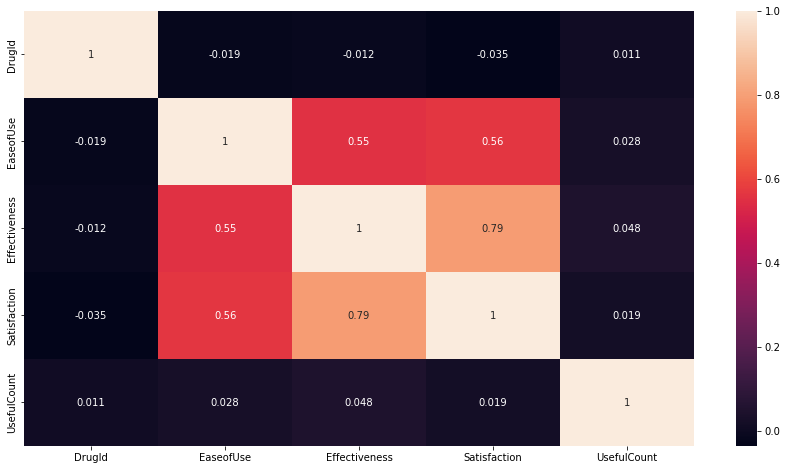

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [23]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

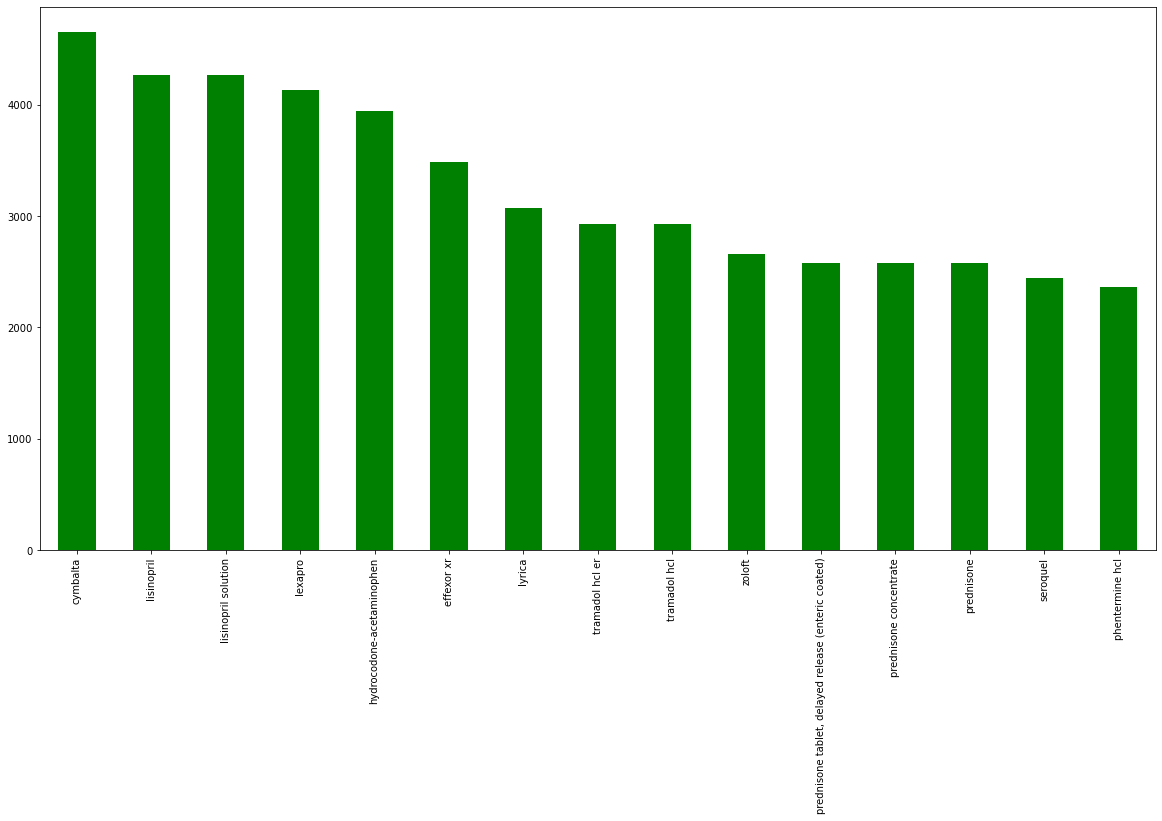

In [24]:
plt.subplots(figsize=(20,10))
data['Drug'].value_counts().head(15).plot(kind='bar',color='green')
plt.show()

# The Drug mostly used by each Age Groups

AGE: 75 or over

In [25]:
df=data.groupby(['Age'])

In [26]:
df1=df.get_group('75 or over')

In [27]:
df1['Drug'].value_counts()

lisinopril solution                                     331
lisinopril                                              331
prednisone                                              167
plavix                                                  167
prednisone concentrate                                  167
                                                       ... 
nexium                                                    1
nexavar                                                   1
nevanac suspension, drops (final dose form)               1
neutrogena t/sal 3 % shampoo keratolytics (shampoos)      1
chantix                                                   1
Name: Drug, Length: 2242, dtype: int64

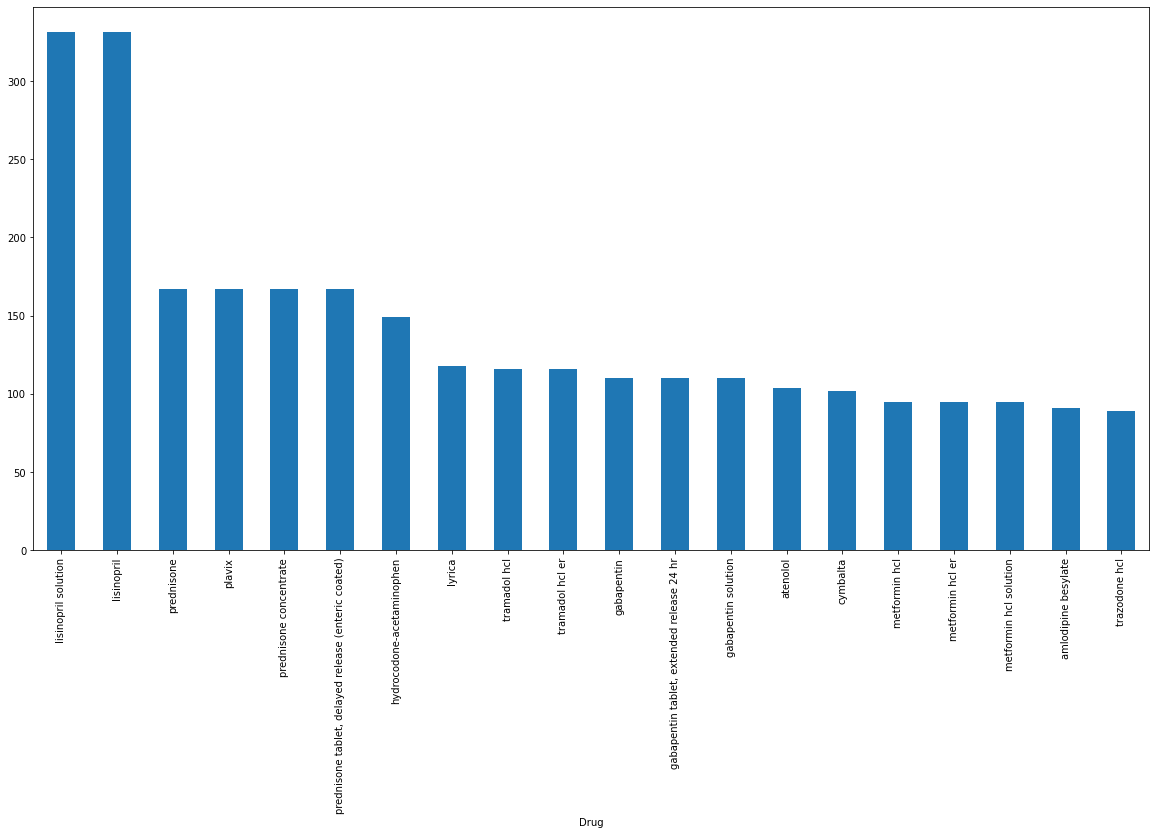

In [28]:
plt.subplots(figsize=(20,10))
df1['Drug'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 75 or over is lisinopril solution  

AGE: 65-74

In [29]:
df2=df.get_group('65-74')

In [30]:
df2['Drug'].value_counts()

lisinopril solution                766
lisinopril                         766
hydrocodone-acetaminophen          412
prednisone concentrate             402
prednisone                         402
                                  ... 
guaiatussin ac                       1
ginkgo                               1
pamidronate disodium vial            1
guaifenesin (bulk) 100 % powder      1
warfarin (bulk) 100 % powder         1
Name: Drug, Length: 3467, dtype: int64

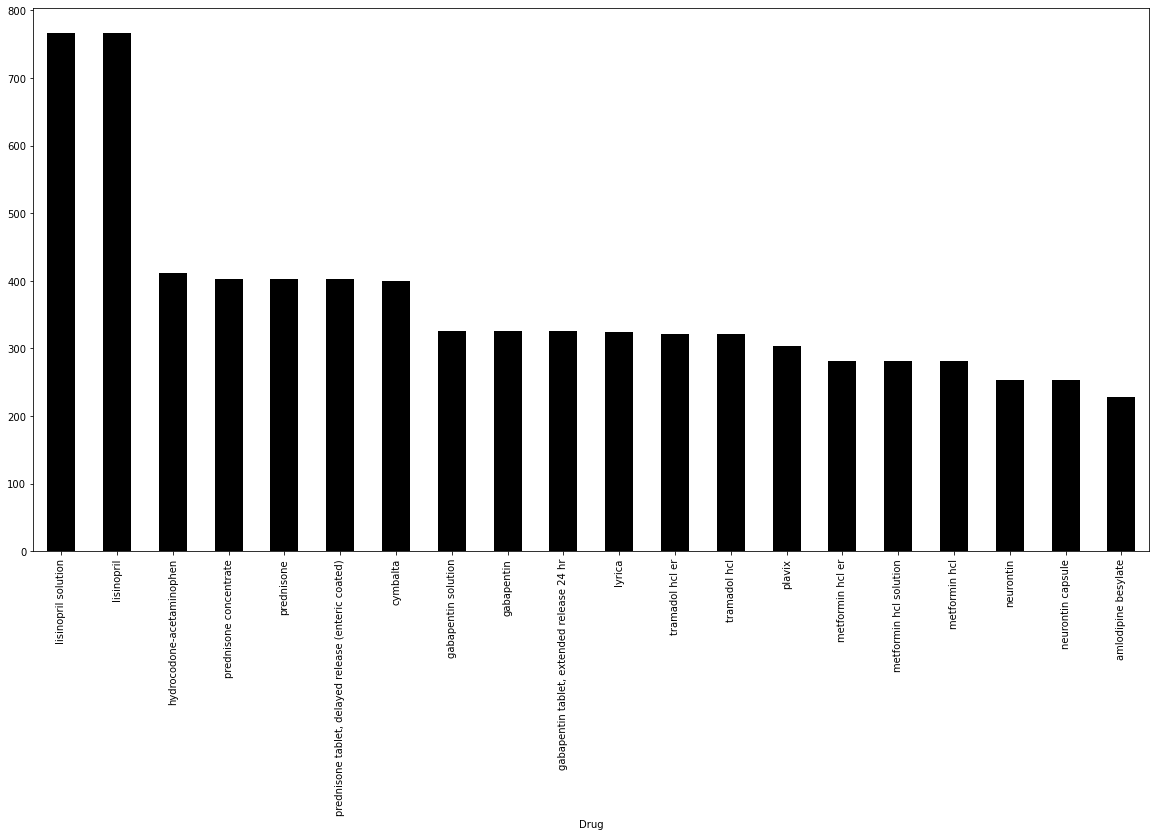

In [31]:
plt.subplots(figsize=(20,10))
df2['Drug'].value_counts().head(20).plot(kind='bar',color='black')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 65-74 is lisinopril solution

AGE: 55-64

In [32]:
df3=df.get_group('55-64')

In [33]:
df3['Drug'].value_counts()

lisinopril solution                                 1191
lisinopril                                          1191
cymbalta                                            1008
hydrocodone-acetaminophen                            831
lyrica                                               816
                                                    ... 
vancomycin-d5w solution, piggyback premix frozen       1
vandetanib tablet                                      1
vascazen                                               1
vasoflex hd                                            1
vogelxo gel                                            1
Name: Drug, Length: 4125, dtype: int64

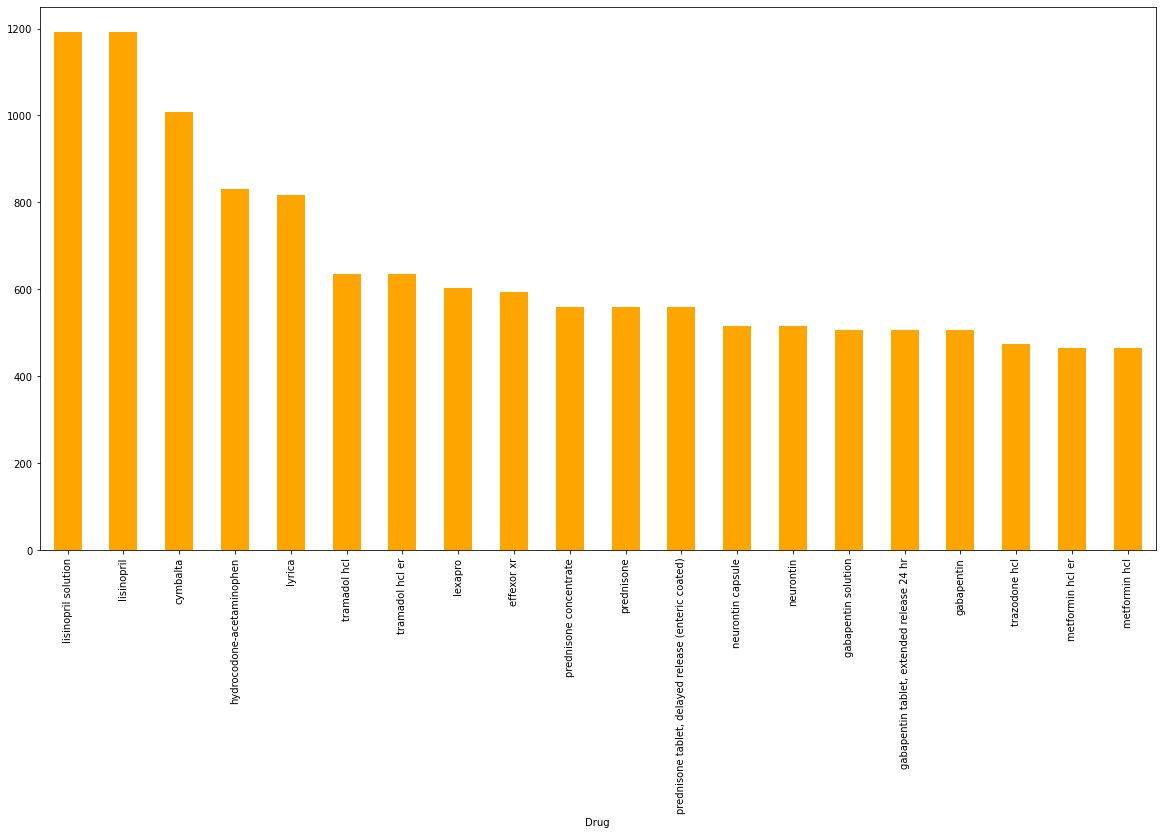

In [34]:
plt.subplots(figsize=(20,10))
df3['Drug'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 55-64 is lisinopril solution

AGE: 45-54 

In [35]:
df4=df.get_group('45-54')

In [36]:
df4['Drug'].value_counts()

cymbalta                                       1291
lisinopril solution                            1111
lisinopril                                     1111
hydrocodone-acetaminophen                       960
lyrica                                          884
                                               ... 
varubi                                            1
vaseretic                                         1
vagistat-3 kit                                    1
vagisil towelette                                 1
urea lotion keratolytics (topical), general       1
Name: Drug, Length: 4123, dtype: int64

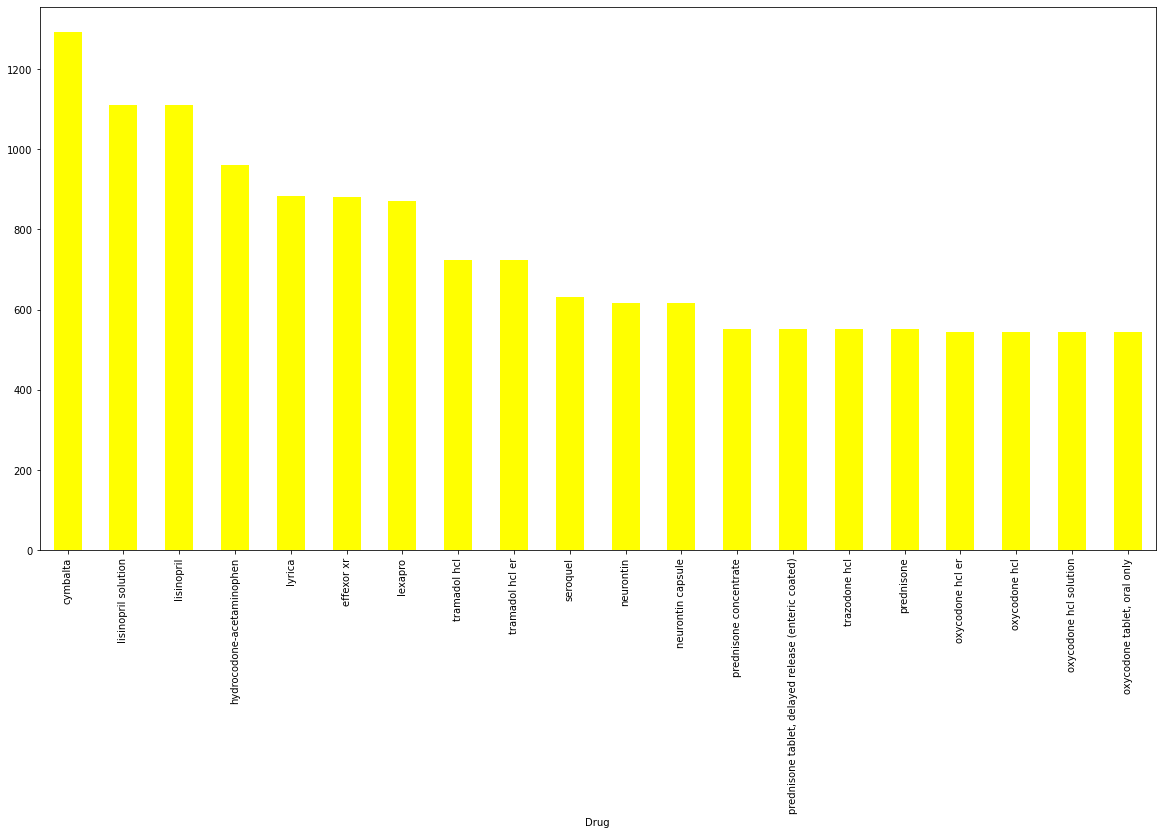

In [37]:
plt.subplots(figsize=(20,10))
df4['Drug'].value_counts().head(20).plot(kind='bar',color='yellow')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 45-54 is cymbalta

AGE: 35-44

In [38]:
df5=df.get_group('35-44')

In [39]:
df5['Drug'].value_counts()

cymbalta                                       874
lexapro                                        809
effexor xr                                     693
hydrocodone-acetaminophen                      690
phentermine hcl                                629
                                              ... 
sleep aid tablet                                 1
ferric ammonium citrate (bulk) 100 % powder      1
ferrogels forte                                  1
ferrous fum-vit c-vit b12-fa capsule             1
warfarin (bulk) 100 % powder                     1
Name: Drug, Length: 3670, dtype: int64

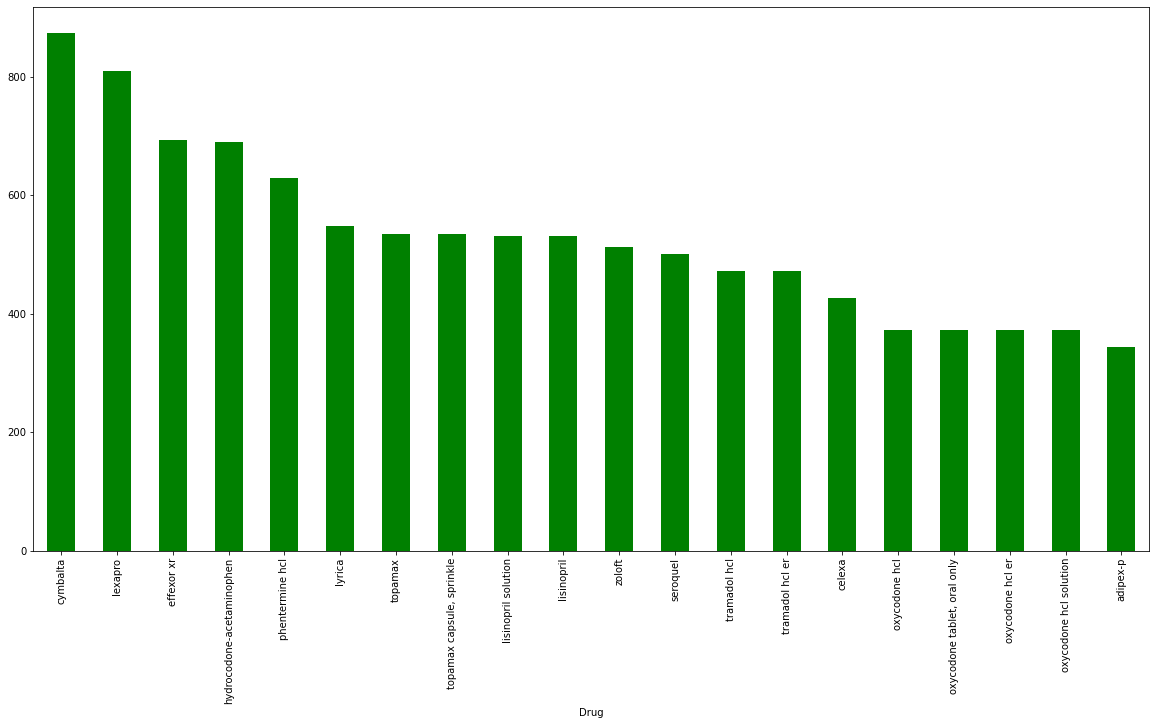

In [40]:
plt.subplots(figsize=(20,10))
df5['Drug'].value_counts().head(20).plot(kind='bar',color='green')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 35-44 is cymbalta

AGE: 25-34

In [41]:
df6=df.get_group('25-34')

In [42]:
df6['Drug'].value_counts()

lexapro                          846
mirena intrauterine device       829
phentermine hcl                  795
effexor xr                       674
cymbalta                         594
                                ... 
axitinib tablet                    1
ayr saline spray, non-aerosol      1
vicks dayquil-nyquil cold-flu      1
vicks dayquil mucus control        1
urea cream emollients              1
Name: Drug, Length: 3338, dtype: int64

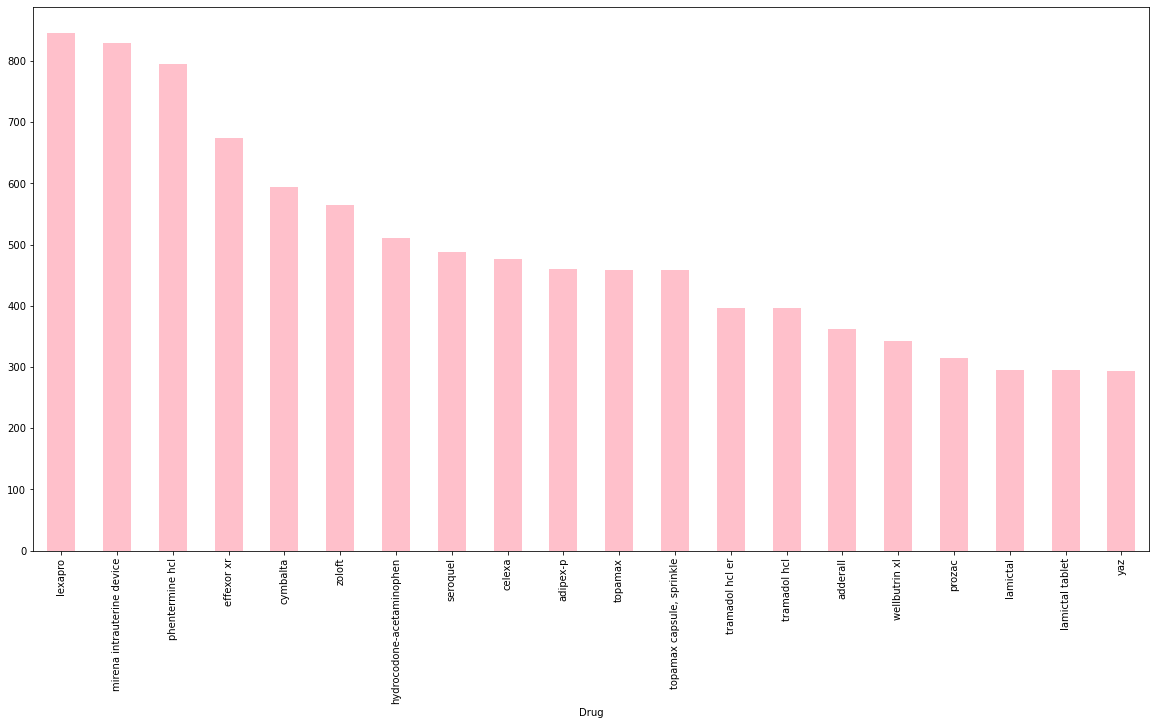

In [43]:
plt.subplots(figsize=(20,10))
df6['Drug'].value_counts().head(20).plot(kind='bar',color='pink')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 25-34 is lexapro

AGE: 19-24

In [44]:
df7=df.get_group('19-24')

In [45]:
df7['Drug'].value_counts()

mirena intrauterine device                                  457
sprintec                                                    424
lexapro                                                     393
zoloft                                                      289
tri-sprintec                                                262
                                                           ... 
aspirin tablet                                                1
aspirin capsule, extended release 24 hr (capsule, er hr)      1
aspirin                                                       1
aricept                                                       1
gyne-lotrimin-7 cream with applicator                         1
Name: Drug, Length: 2187, dtype: int64

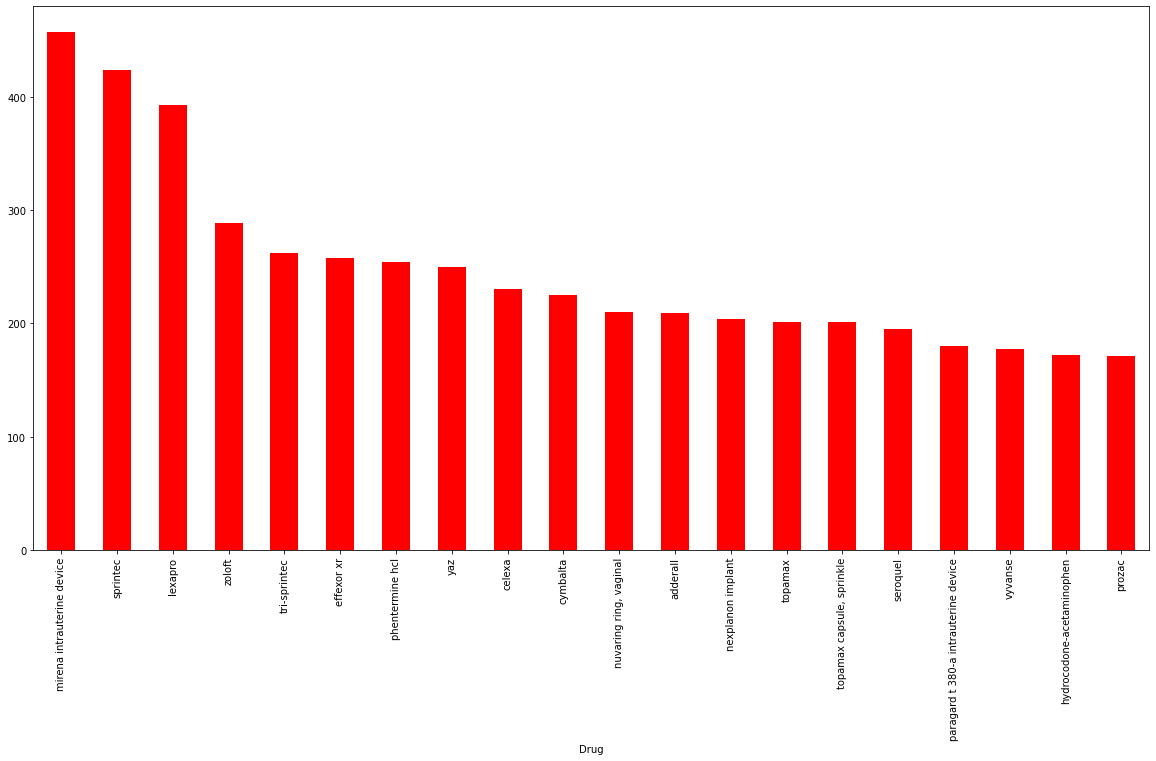

In [46]:
plt.subplots(figsize=(20,10))
df7['Drug'].value_counts().head(20).plot(kind='bar',color='red')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 19-24 is mirena intrauterine device

AGE: 13-18

In [47]:
df8=df.get_group('13-18')

In [48]:
df8['Drug'].value_counts()

lexapro                       155
vyvanse                       152
zoloft                        147
concerta                      141
sprintec                      133
                             ... 
tranylcypromine sulfate         1
tranexamic acid                 1
tramadol hcl-acetaminophen      1
tylenol extra strength          1
taclonex ointment               1
Name: Drug, Length: 1280, dtype: int64

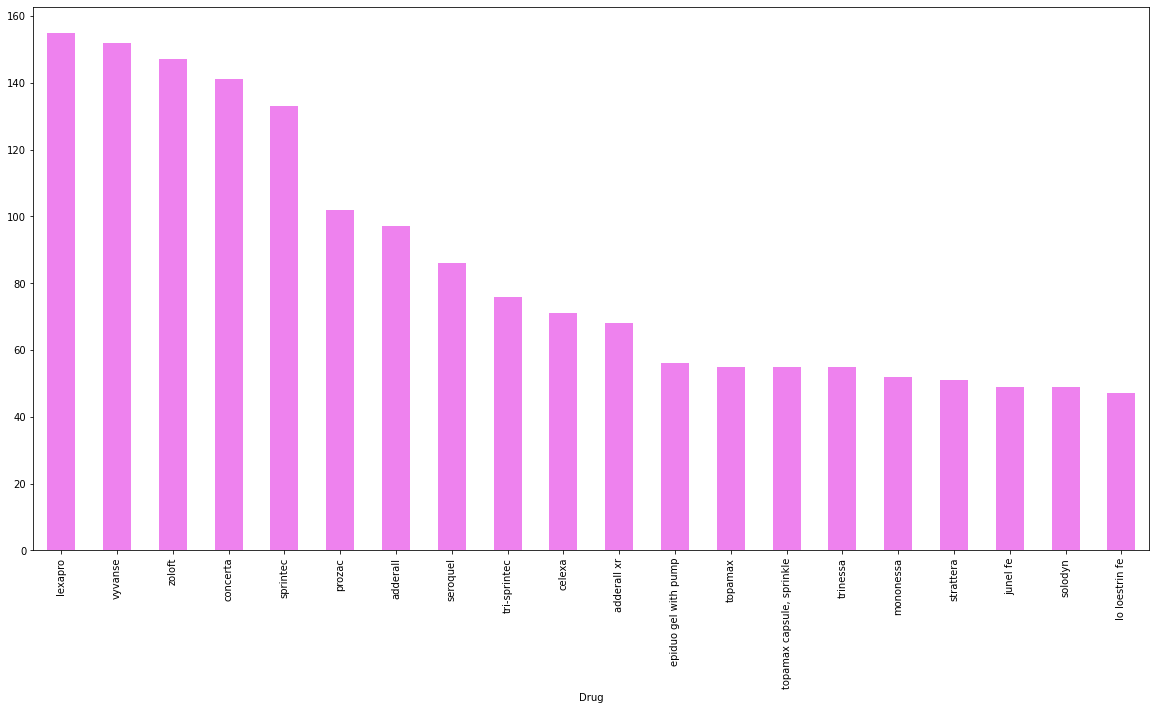

In [49]:
plt.subplots(figsize=(20,10))
df8['Drug'].value_counts().head(20).plot(kind='bar',color='violet')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 13-18 is lexapro

AGE: 7-12

In [50]:
df9=df.get_group('7-12')

In [51]:
df9['Drug'].value_counts()

vyvanse                          146
concerta                          97
focalin xr                        61
intuniv                           45
adderall xr                       41
                                ... 
sprycel                            1
sodium fluoride                    1
sulfasalazine dr                   1
sulfamethoxazole-trimethoprim      1
children's allegra allergy         1
Name: Drug, Length: 462, dtype: int64

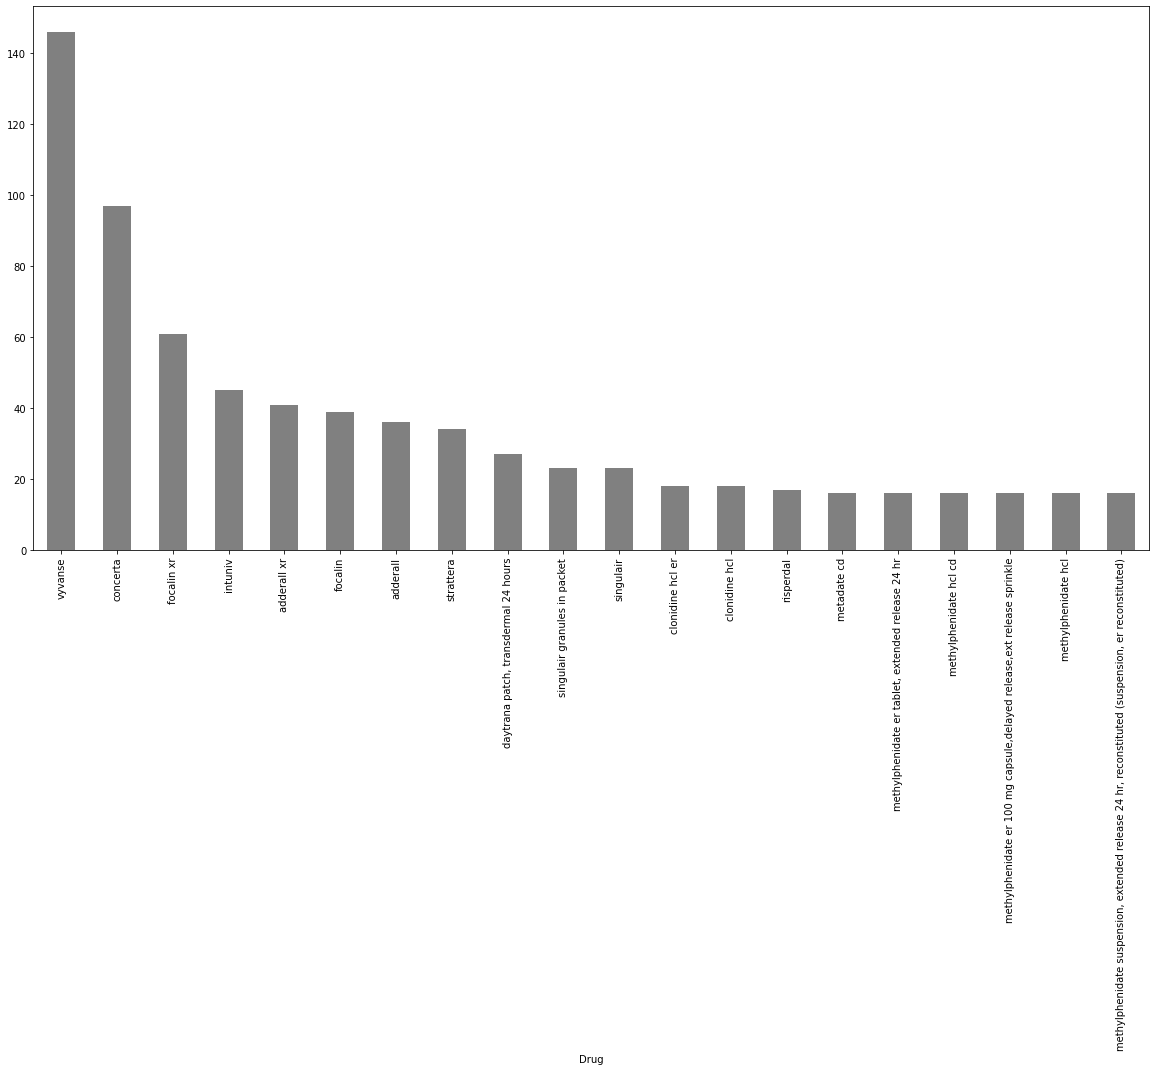

In [52]:
plt.subplots(figsize=(20,10))
df9['Drug'].value_counts().head(20).plot(kind='bar',color='grey')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 7-12 is vyvanse 

AGE: 3-6

In [53]:
df10=df.get_group('3-6')

In [54]:
df10['Drug'].value_counts()

vyvanse                         50
adderall                        27
singulair granules in packet    25
singulair                       25
risperdal                       23
                                ..
xyzal                            1
xeljanz                          1
xeljanz xr                       1
vasoflex forte                   1
allergy relief tablet            1
Name: Drug, Length: 325, dtype: int64

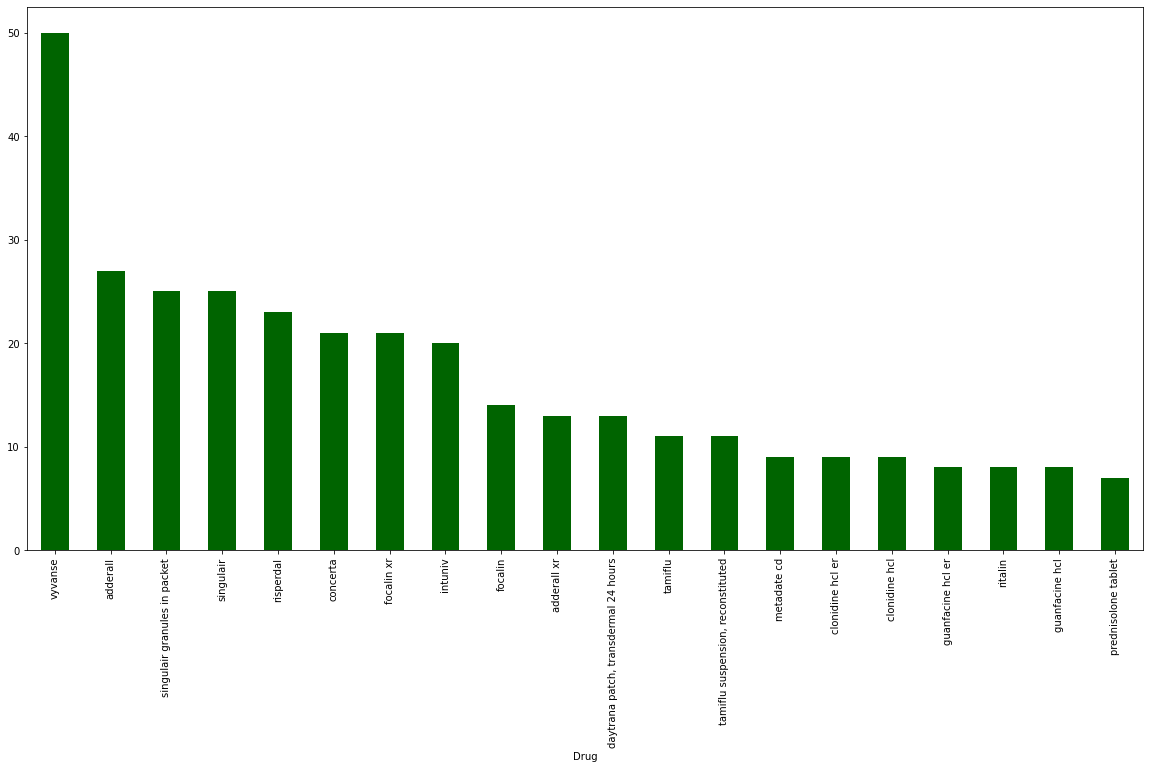

In [55]:
plt.subplots(figsize=(20,10))
df10['Drug'].value_counts().head(20).plot(kind='bar',color='darkgreen')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 3-6 is vyvanse

AGE: 0-2

In [56]:
df11=df.get_group('0-2')

In [57]:
df11['Drug'].value_counts()

cefdinir                        14
cefdinir capsule                14
keppra                          10
amoxicillin tablet, chewable     9
amoxicillin                      9
                                ..
zovirax cream                    1
zovirax                          1
zithromax                        1
scalp relief liquid              1
veripred 20                      1
Name: Drug, Length: 278, dtype: int64

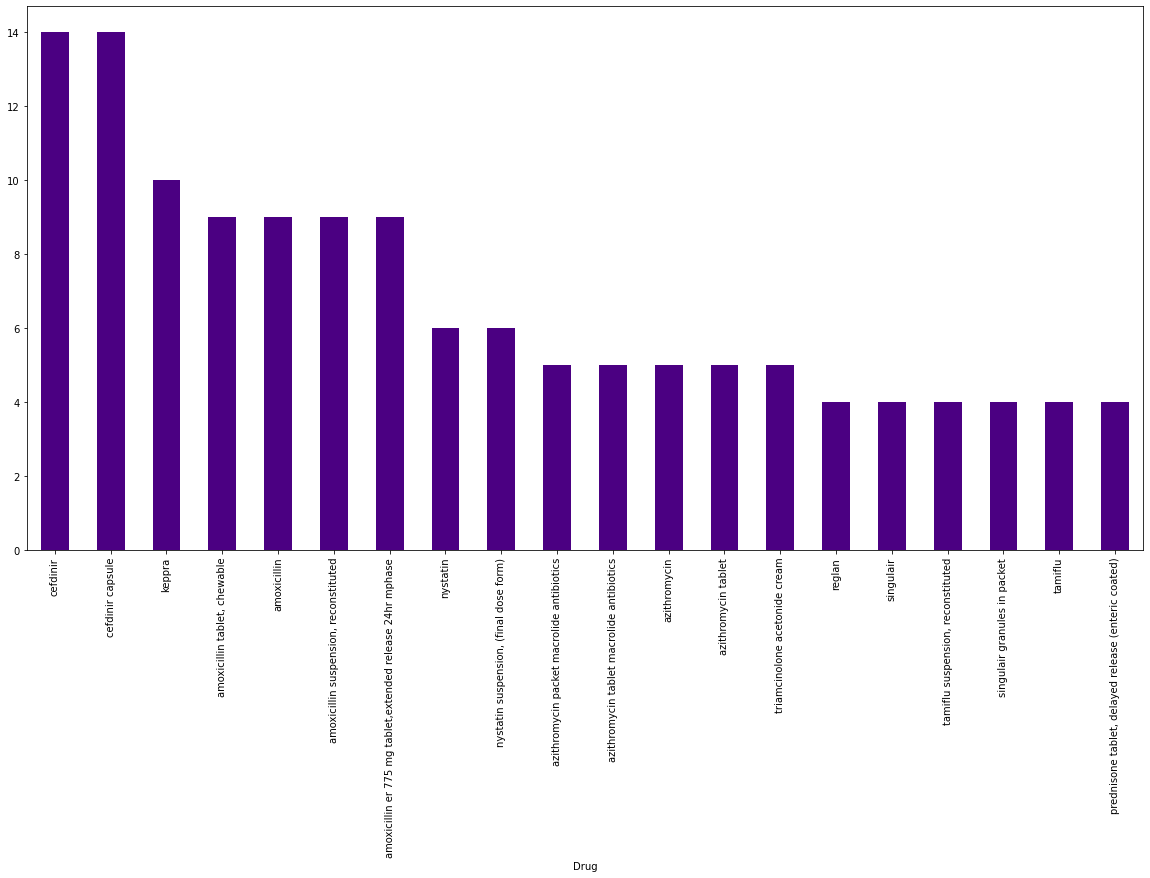

In [58]:
plt.subplots(figsize=(20,10))
df11['Drug'].value_counts().head(20).plot(kind='bar',color='indigo')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by age group 0-2 is cefdinir

# The Drug mostly used by each Male and Female

In [59]:
dff=data.groupby(['Sex'])

In [60]:
dff1=dff.get_group('Male')

In [61]:
dff1['Drug'].value_counts()

lisinopril solution                                   1639
lisinopril                                            1639
hydrocodone-acetaminophen                             1498
oxycodone hcl                                          872
tramadol hcl                                           872
                                                      ... 
nicorette gum                                            1
fludarabine phosphate vial                               1
fiasp vial                                               1
fiber laxative tablet                                    1
omeprazole-clarith-amoxicillin combination package       1
Name: Drug, Length: 4750, dtype: int64

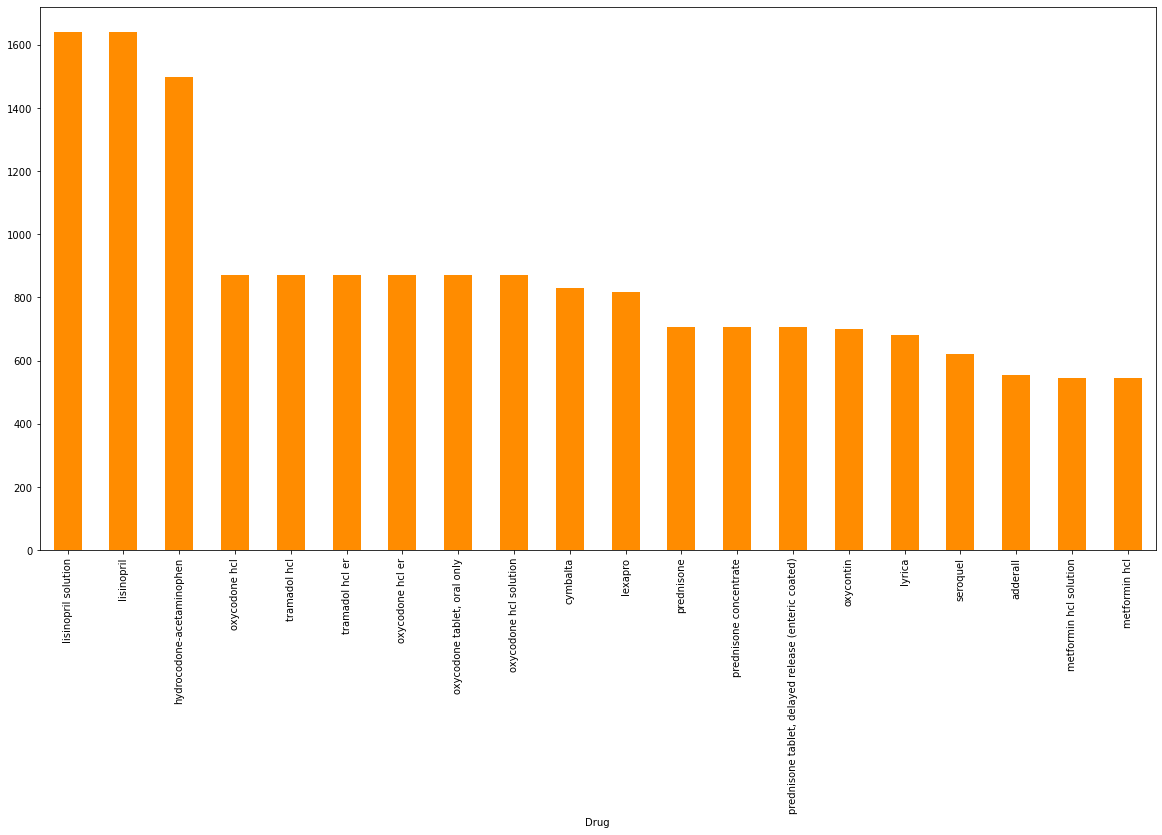

In [62]:
plt.subplots(figsize=(20,10))
dff1['Drug'].value_counts().head(20).plot(kind='bar',color='darkorange')
plt.xlabel('Drug')
plt.show()

RESULT: Drugs mostly used by Male are lisinopril solution and lisinopril 

In [63]:
dff2=dff.get_group('Female')

In [64]:
dff2['Drug'].value_counts()

cymbalta                                                  3621
lexapro                                                   3095
effexor xr                                                2771
lisinopril solution                                       2383
lisinopril                                                2383
                                                          ... 
xyzbac                                                       1
xylocaine-mpf with epinephrine vial                          1
interferon alfa-n3 solution                                  1
xylitol-antiseptic comb no.5 lozenge, extended release       1
minerin lotion                                               1
Name: Drug, Length: 5882, dtype: int64

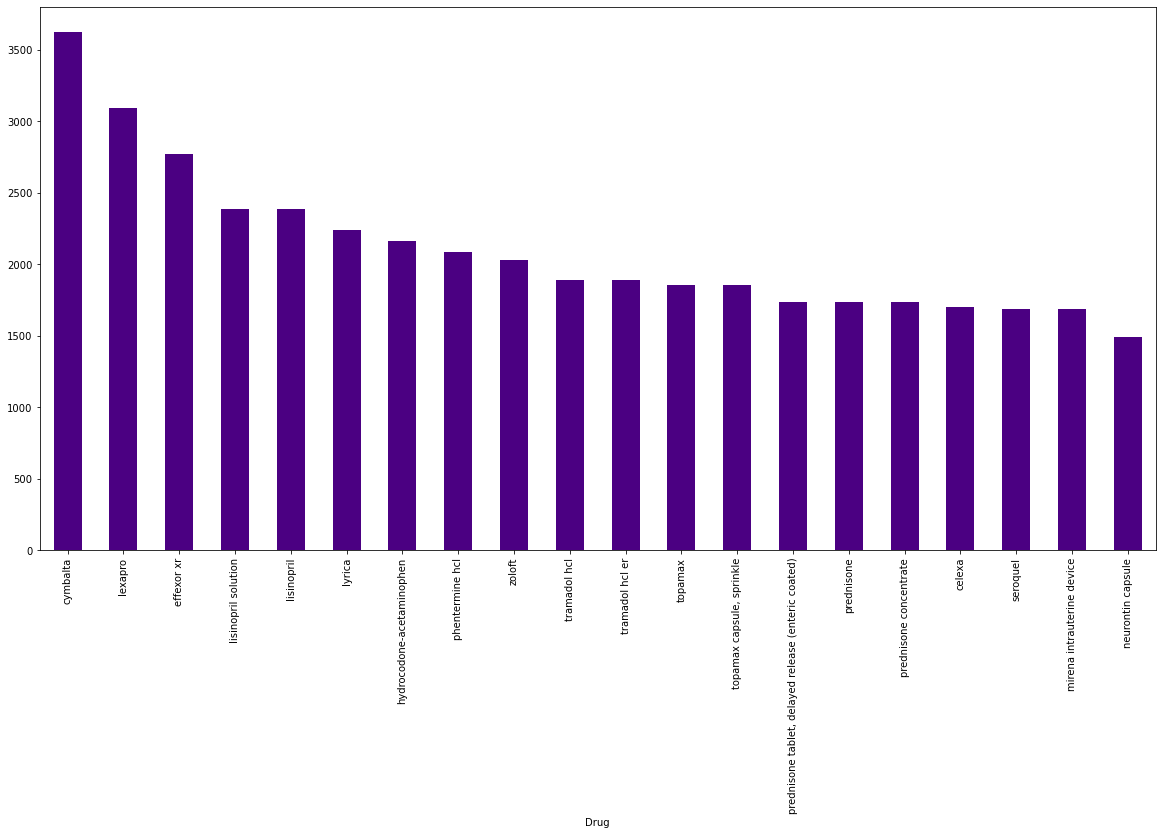

In [65]:
plt.subplots(figsize=(20,10))
dff2['Drug'].value_counts().head(20).plot(kind='bar',color='indigo')
plt.xlabel('Drug')
plt.show()

RESULT: Drug mostly used by Female is cymbalta

# Most Effective Drug

In [66]:
ddf=data.groupby(['Effectiveness'])

In [67]:
ddf1=ddf.get_group(5)

In [68]:
ddf1['Drug'].value_counts()

lexapro                             1690
phentermine hcl                     1386
cymbalta                            1369
effexor xr                          1277
hydrocodone-acetaminophen           1230
                                    ... 
imipenem-cilastatin sodium vial        1
aqu aerosol, spray with pump           1
maginex                                1
magic bullet suppository, rectal       1
nomlands lotion                        1
Name: Drug, Length: 5377, dtype: int64

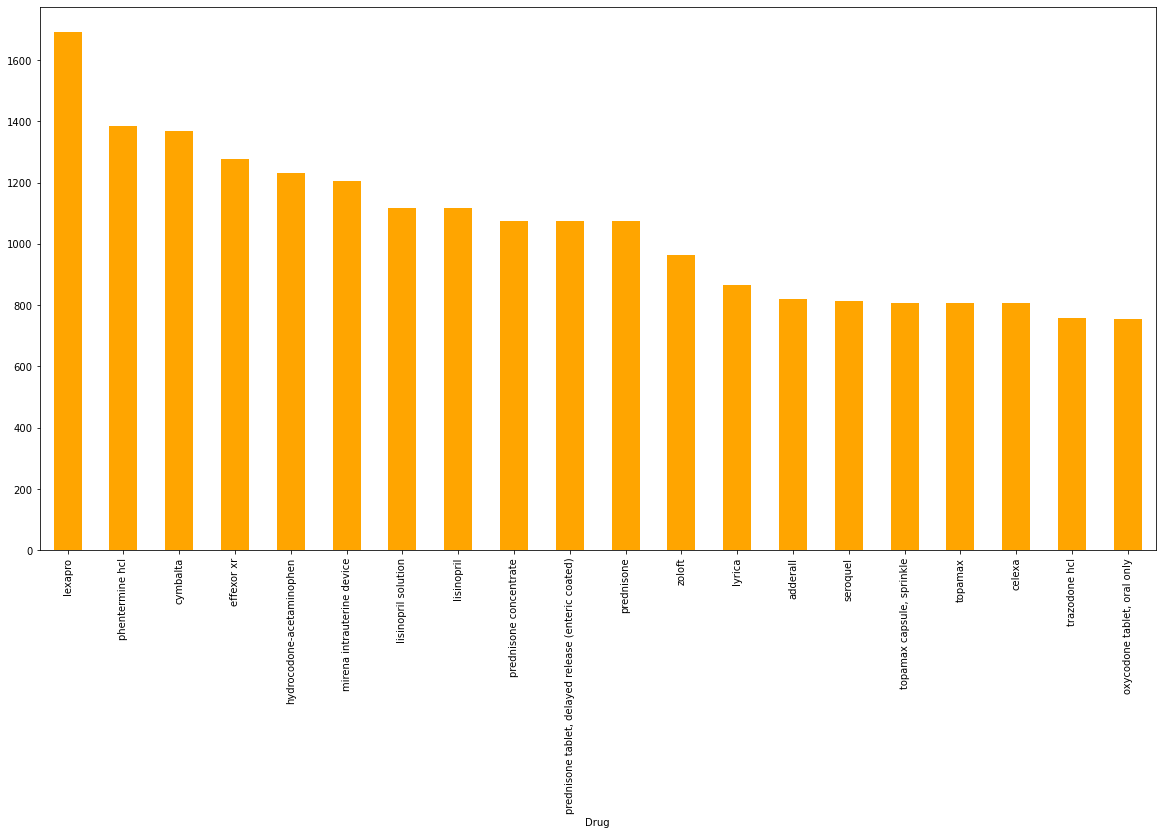

In [69]:
plt.subplots(figsize=(20,10))
ddf1['Drug'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('Drug')
plt.show()

RESULT: lexapro is the most effective drug because it have more 5 star rating compared to others.

In [70]:
ddf2=ddf.get_group(1)

In [71]:
ddf2['Drug'].value_counts()

cymbalta                                                               953
lisinopril solution                                                    666
lisinopril                                                             666
lyrica                                                                 603
tramadol hcl er                                                        555
                                                                      ... 
nilandron                                                                1
xylocaine vial                                                           1
xylitol-antiseptic comb no.5 lozenge, extended release                   1
fentanyl-ropivacaine-nacl (pf) 5 mcg/ml-0.0625 % injection solution      1
warfarin (bulk) 100 % powder                                             1
Name: Drug, Length: 3912, dtype: int64

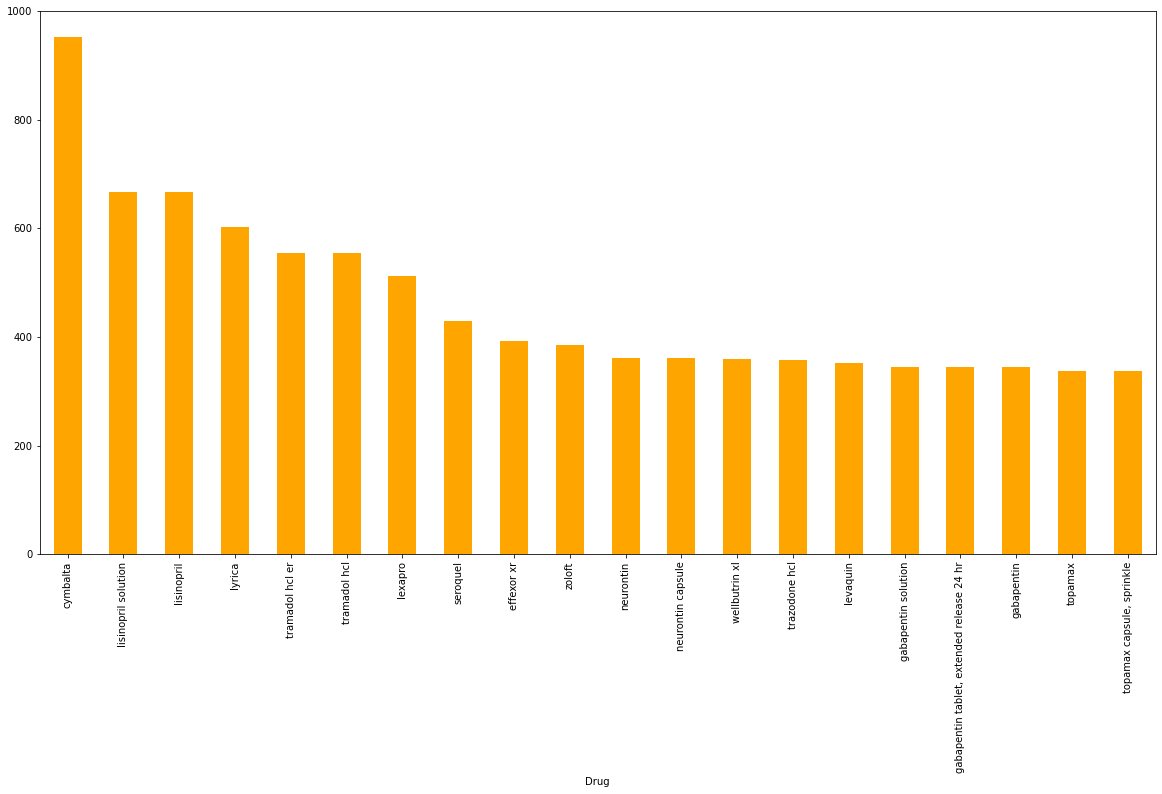

In [72]:
plt.subplots(figsize=(20,10))
ddf2['Drug'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('Drug')
plt.show()

RESULT: cymbalta is the less effective drug because it has more 1 star rating compared to others.

# Most Satisfied Drug

In [73]:
ddff=data.groupby(['Satisfaction'])

In [74]:
ddff1=ddff.get_group(5)

In [75]:
ddff1['Drug'].value_counts()

lexapro                                    1521
hydrocodone-acetaminophen                  1310
phentermine hcl                            1291
cymbalta                                   1268
effexor xr                                 1011
                                           ... 
acerola c wafer                               1
acetaminophen pm xtra strength                1
acetaminophen suppository, rectal             1
mg217 psoriasis ointment                      1
allergy relief tablet, extended release       1
Name: Drug, Length: 5306, dtype: int64

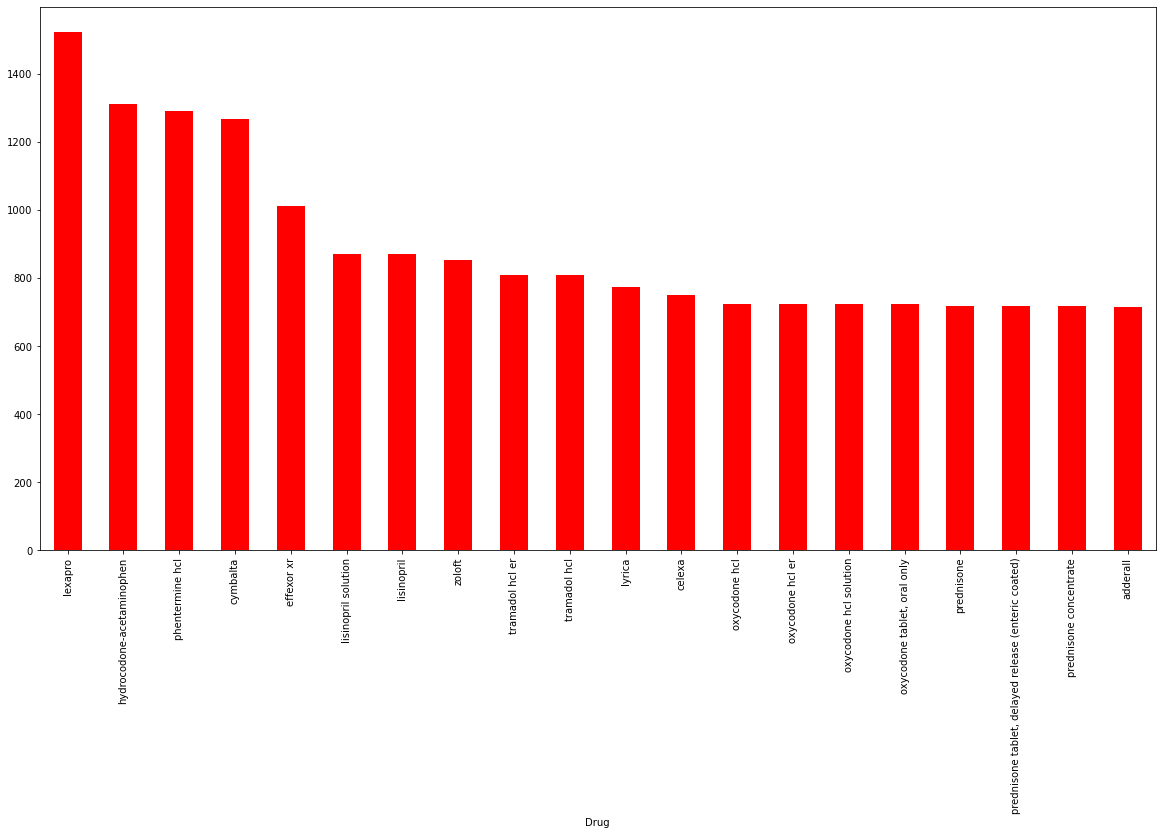

In [76]:
plt.subplots(figsize=(20,10))
ddff1['Drug'].value_counts().head(20).plot(kind='bar',color='red')
plt.xlabel('Drug')
plt.show()

RESULT: People are more satisfied with the drug lexapro 

In [77]:
ddff2=ddff.get_group(1)

In [78]:
ddff2['Drug'].value_counts()

lisinopril solution                                       1518
lisinopril                                                1518
cymbalta                                                  1490
lyrica                                                     929
tramadol hcl er                                            838
                                                          ... 
xylitol-antiseptic comb no.5 lozenge, extended release       1
xylitol (bulk) powder                                        1
xanthan gum powder                                           1
xalkori                                                      1
maginex                                                      1
Name: Drug, Length: 4408, dtype: int64

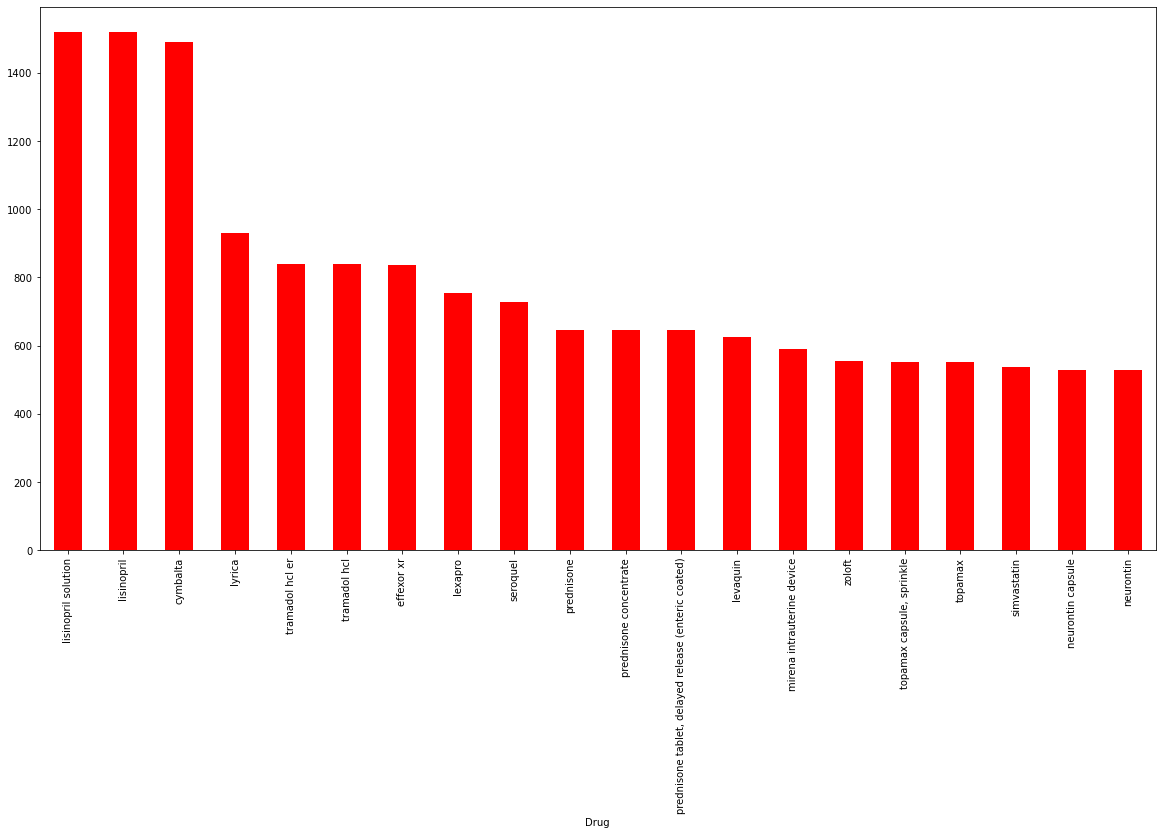

In [79]:
plt.subplots(figsize=(20,10))
ddff2['Drug'].value_counts().head(20).plot(kind='bar',color='red')
plt.xlabel('Drug')
plt.show()

RESULT: People are not satisfied with the drug lisinopril solution . But still many people are using that. May be because of its side effects people are not satisfied with that drug.

In [80]:
drug=data.groupby(['Drug'])

In [81]:
drug1=drug.get_group('lexapro')

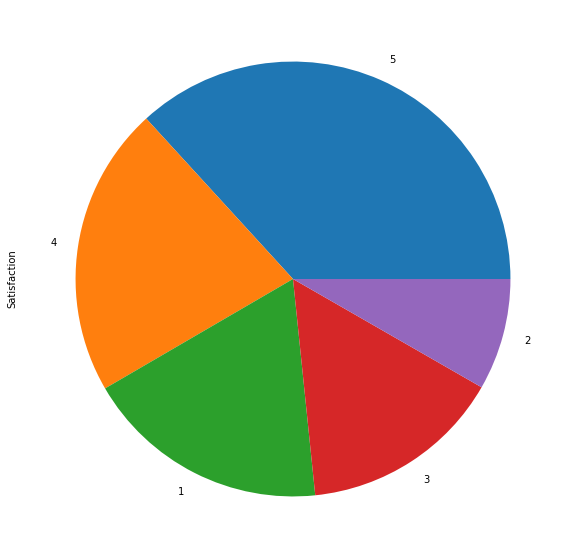

In [82]:
plt.subplots(figsize=(20,10))
drug1['Satisfaction'].value_counts().head(20).plot(kind='pie')
plt.show()

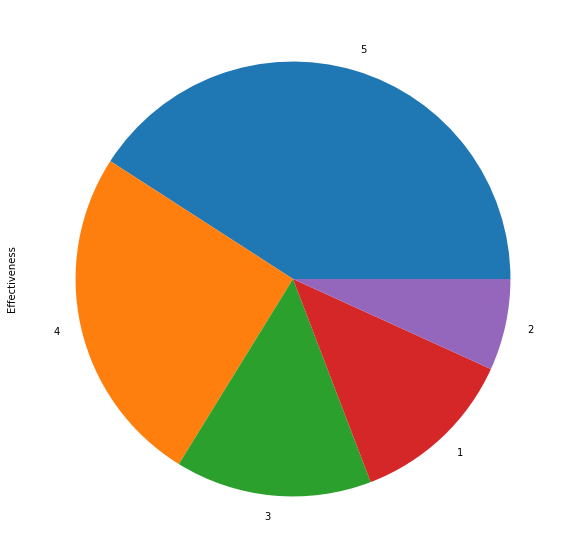

In [83]:
plt.subplots(figsize=(20,10))
drug1['Effectiveness'].value_counts().head(20).plot(kind='pie')
plt.show()

In [84]:
drug2=drug.get_group('cymbalta')

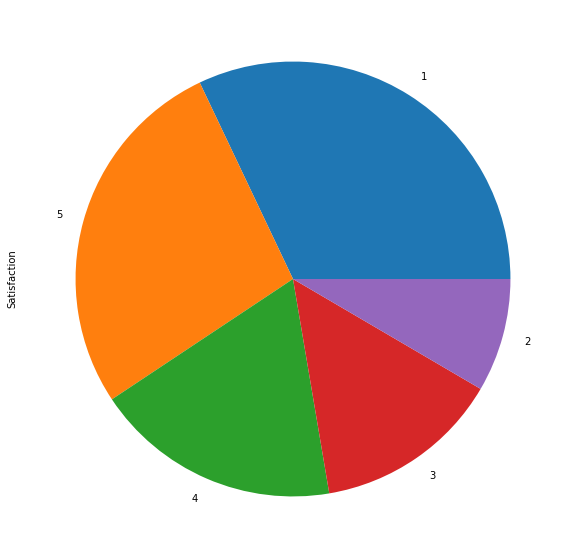

In [85]:
plt.subplots(figsize=(20,10))
drug2['Satisfaction'].value_counts().head(20).plot(kind='pie')
plt.show()

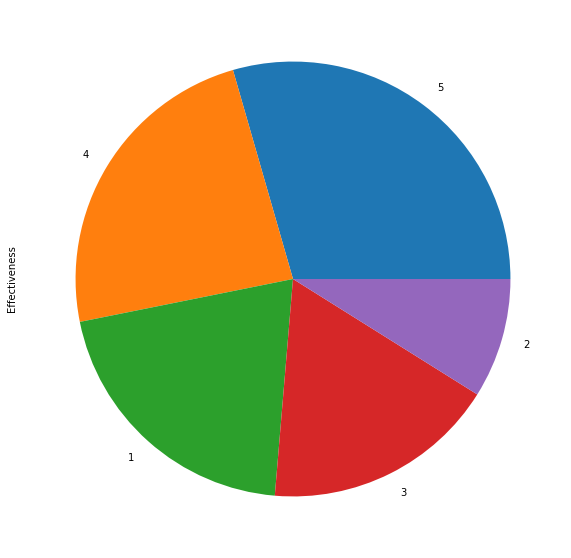

In [86]:
plt.subplots(figsize=(20,10))
drug2['Effectiveness'].value_counts().head(20).plot(kind='pie')
plt.show()

In [87]:
drug3=drug.get_group('lisinopril solution')

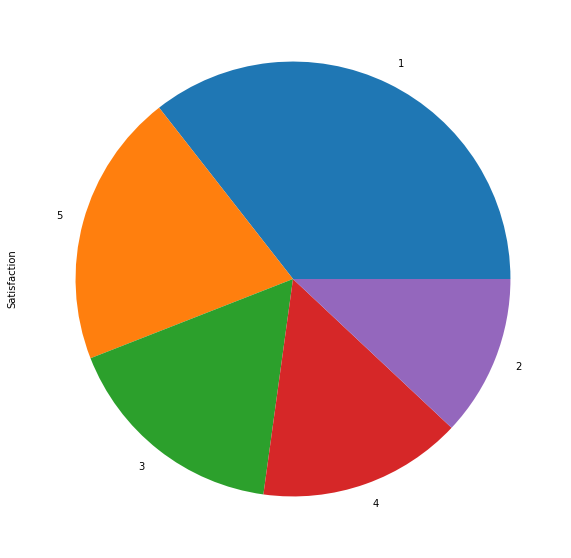

In [88]:
plt.subplots(figsize=(20,10))
drug3['Satisfaction'].value_counts().head(20).plot(kind='pie')
plt.show()

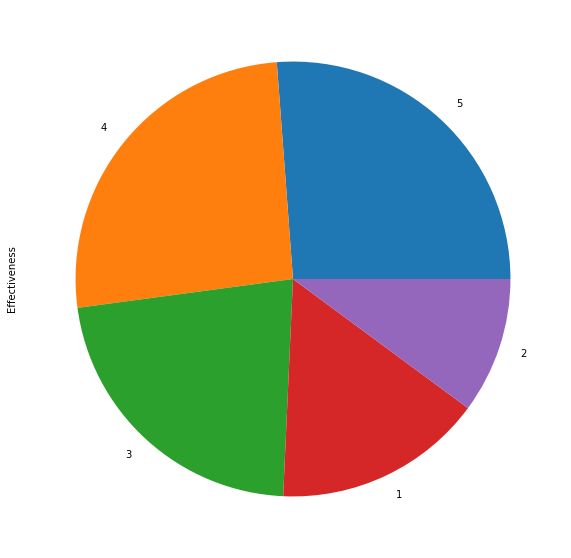

In [89]:
plt.subplots(figsize=(20,10))
drug3['Effectiveness'].value_counts().head(20).plot(kind='pie')
plt.show()

# Data Preprocessing

# Data Cleaning:  Filling of missing values

In [90]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

We can see that there are 37 missing values in Review. 

In [91]:
data=data.dropna()

In [92]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [93]:
data['Effectiveness'].unique()

array([ 5,  3,  2,  1,  4,  6, 10], dtype=int64)

In [94]:
data['EaseofUse'].unique()

array([ 5,  2,  1,  4,  3,  6, 10], dtype=int64)

In [95]:
data['Satisfaction'].unique()

array([ 5,  3,  1,  4,  2,  6, 10], dtype=int64)

Effectiveness, EaseofUse, Satisfaction are 5 star ratings. So numbers in those columns will be 1 to 5. But here we can see 6 and 10. We are going to remove those rows.

In [96]:
data[data['Effectiveness']==6].index

Int64Index([195073, 195282], dtype='int64')

In [97]:
data[data['Effectiveness']==10].index

Int64Index([273577], dtype='int64')

In [98]:
data[data['EaseofUse']==6].index

Int64Index([195073, 195282], dtype='int64')

In [99]:
data[data['EaseofUse']==10].index

Int64Index([273577], dtype='int64')

In [100]:
data[data['Satisfaction']==6].index

Int64Index([195073, 195282], dtype='int64')

In [101]:
data[data['Satisfaction']==10].index

Int64Index([273577], dtype='int64')

In [102]:
data=data.drop([195073, 195282,273577])

In [103]:
data['EaseofUse'].unique()

array([5, 2, 1, 4, 3], dtype=int64)

In [104]:
data['Satisfaction'].unique()

array([5, 3, 1, 4, 2], dtype=int64)

In [105]:
data['Effectiveness'].unique()

array([5, 3, 2, 1, 4], dtype=int64)

In [106]:
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       ' ', '13-18', '7-12', '0-2', '3-6'], dtype=object)

In [107]:
data[data['Age']== ' '].index

Int64Index([    12,     73,     91,    184,    185,    209,    325,    511,
               587,    589,
            ...
            362236, 362350, 362405, 362425, 362450, 362517, 362571, 362598,
            362645, 362802],
           dtype='int64', length=12199)

In [108]:
ind1=data[data['Age']== ' '].index

In [109]:
data['Age'].mode()

0    45-54
Name: Age, dtype: object

In [110]:
data['Age'][ind1]='45-54'

In [111]:
data[data['Age']== ' '].index

Int64Index([], dtype='int64')

In [112]:
data['Sex'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [113]:
data[data['Sex']== ' '].index

Int64Index([    11,     14,     15,     17,     20,     22,     24,     31,
                33,     34,
            ...
            362405, 362414, 362450, 362488, 362517, 362571, 362645, 362673,
            362800, 362802],
           dtype='int64', length=26532)

In [114]:
ind2=data[data['Sex']== ' '].index

In [115]:
data['Sex'].mode()

0    Female
Name: Sex, dtype: object

In [116]:
data['Sex'][ind2]='Female'

In [117]:
data[data['Sex']== ' '].index

Int64Index([], dtype='int64')

In [118]:
data['Condition'].unique()

array(['Stuffy Nose', 'Cold Symptoms', 'Other', ...,
       'Combative and Explosive Behavior', 'Lead Poisoning',
       'Poisoning from Swallowed Unknown Substance'], dtype=object)

In [119]:
data[data['Condition']== ' '].index

Int64Index([ 31316,  37013,  37117,  49273,  52267,  63607,  63676,  63722,
             68864,  71020,  75003,  90380,  90512,  90777,  98289,  98440,
            105702, 113904, 118300, 118311, 121989, 135173, 140701, 144696,
            171731, 186903, 190720, 223756, 223764, 224266, 225702, 229030,
            229086, 239316, 263893, 264204, 282976, 301436, 326306, 336975,
            342915, 342937, 347026],
           dtype='int64')

In [120]:
ind3=data[data['Condition']== ' '].index

In [121]:
data=data.drop(ind3)

# Feature Engineering

In [122]:
import scipy.stats as stats

data_chi_result=[]
for i in data.columns:
    chi2_val, p_val, dof2, ex1 = stats.chi2_contingency(pd.crosstab(data[i], data['Satisfaction']))
    data_chi_result.append([i,chi2_val,p_val])
    
chi_df = pd.DataFrame(data_chi_result, columns=['Features', 'Chi2 val', 'p-val'])
chi_df.sort_values(by='p-val',ascending=True, inplace=True)    


In [123]:
chi_df

,Features,Chi2 val,p-val
1,Condition,3.677726e+04,0.000000e+00
2,Date,3.510845e+04,0.000000e+00
3,Drug,7.548635e+04,0.000000e+00
4,DrugId,7.548635e+04,0.000000e+00
5,EaseofUse,1.747963e+05,0.000000e+00
6,Effectiveness,4.271955e+05,0.000000e+00
7,Reviews,1.272622e+06,0.000000e+00
8,Satisfaction,1.450892e+06,0.000000e+00
9,Sex,1.623981e+03,0.000000e+00
10,Sides,4.468931e+04,0.000000e+00


In [124]:
print(chi_df[chi_df['p-val']<0.05])

         Features      Chi2 val          p-val
1       Condition  3.677726e+04   0.000000e+00
2            Date  3.510845e+04   0.000000e+00
3            Drug  7.548635e+04   0.000000e+00
4          DrugId  7.548635e+04   0.000000e+00
5       EaseofUse  1.747963e+05   0.000000e+00
6   Effectiveness  4.271955e+05   0.000000e+00
7         Reviews  1.272622e+06   0.000000e+00
8    Satisfaction  1.450892e+06   0.000000e+00
9             Sex  1.623981e+03   0.000000e+00
10          Sides  4.468931e+04   0.000000e+00
11    UsefulCount  4.825993e+03   0.000000e+00
0             Age  1.031934e+03  2.451052e-190


We are going to remove three columns from the dataset

In [125]:
data=data.drop(['Reviews','DrugId','Date'],axis=1)

# Selecting Dataset of a particular drug to build the model

In [126]:
data['Drug'].value_counts()

cymbalta                                 4648
lisinopril solution                      4267
lisinopril                               4267
lexapro                                  4133
hydrocodone-acetaminophen                3943
                                         ... 
huperzine serrate a (bulk) 1 % powder       1
sorbsan topical wound dressing 3" x         1
q-pap extra strength                        1
symax                                       1
vanadium granules                           1
Name: Drug, Length: 7093, dtype: int64

# Dataset of Lisinorphil solution

In [127]:
df=data.groupby('Drug')

In [128]:
df1=df.get_group('lisinopril solution')

In [129]:
df1.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
9197,45-54,High Blood Pressure,lisinopril solution,5,5,5,Female,"Dizziness , lightheadedness , tiredness, or ...",14
9203,75 or over,High Blood Pressure,lisinopril solution,5,4,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3
9209,55-64,High Blood Pressure,lisinopril solution,4,5,4,Male,"Dizziness , lightheadedness , tiredness, or ...",3
9215,65-74,High Blood Pressure,lisinopril solution,5,5,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6
9221,55-64,High Blood Pressure,lisinopril solution,2,4,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12


In [130]:
df1.shape

(4267, 9)

In [131]:
df1.columns

Index(['Age', 'Condition', 'Drug', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'Sex', 'Sides', 'UsefulCount'],
      dtype='object')

In [132]:
df1['Age'].unique()

array(['45-54', '75 or over', '55-64', '65-74', '25-34', '35-44', '13-18',
       '19-24', '0-2', '7-12'], dtype=object)

In [133]:
df1['Condition'].unique()

array(['High Blood Pressure', 'Other', 'Chronic Heart Failure',
       'Migraine Prevention',
       'Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Prevention of Recurrent Atrial Fibrillation',
       'Kidney Disease from Diabetes', 'Diastolic Heart Failure',
       'Heart Attack', 'Failure of the Left Ventricle of the Heart',
       'Nondiabetic Proteinuric Nephropathy',
       'Retinal Changes of Eye in a Patient with Diabetes'], dtype=object)

The drug lisinorphil solution is used for the above mentioned conditions. And it is used by all the age groups. Dataset contain the details of the people in all the age groups.

In [134]:
df1['Sides'].unique()

array(['Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.'],
      dtype=object)

Lisinorphil solution have above mentioned sides. We are going to build a model to classify the side effects of the drug.

In [135]:
df1['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [136]:
df1['Satisfaction'].unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [137]:
df1['Effectiveness'].unique()

array([5, 4, 1, 2, 3], dtype=int64)

In [138]:
df1['UsefulCount'].unique()

array([ 14,   3,   6,  12,  22,  37,  24,   4,  19,  11,  39,  17,  25,
        10,   0,   5,  27,  21,   7,  16,   9,   8,  15,  23,   2,  18,
        34,  30,  28,  43,  13,  26,   1,  38,  35,  36,  31,  20,  58,
        62,  52,  40,  54,  33,  32,  29,  70, 113,  44,  46,  83,  63,
       140,  88, 100,  56,  66,  45], dtype=int64)

In [139]:
df1['EaseofUse'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [140]:
df1.describe()

,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,4267.000000,4267.000000,4267.000000,4267.000000
mean,3.982423,3.370518,2.728615,6.754394
std,1.290239,1.376687,1.560901,7.460014
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,2.000000,1.000000,2.000000
50%,4.000000,4.000000,3.000000,5.000000
75%,5.000000,5.000000,4.000000,10.000000
max,5.000000,5.000000,5.000000,140.000000


In [141]:
df1.isna().sum()

Age              0
Condition        0
Drug             0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# Exploratory Data Analysis

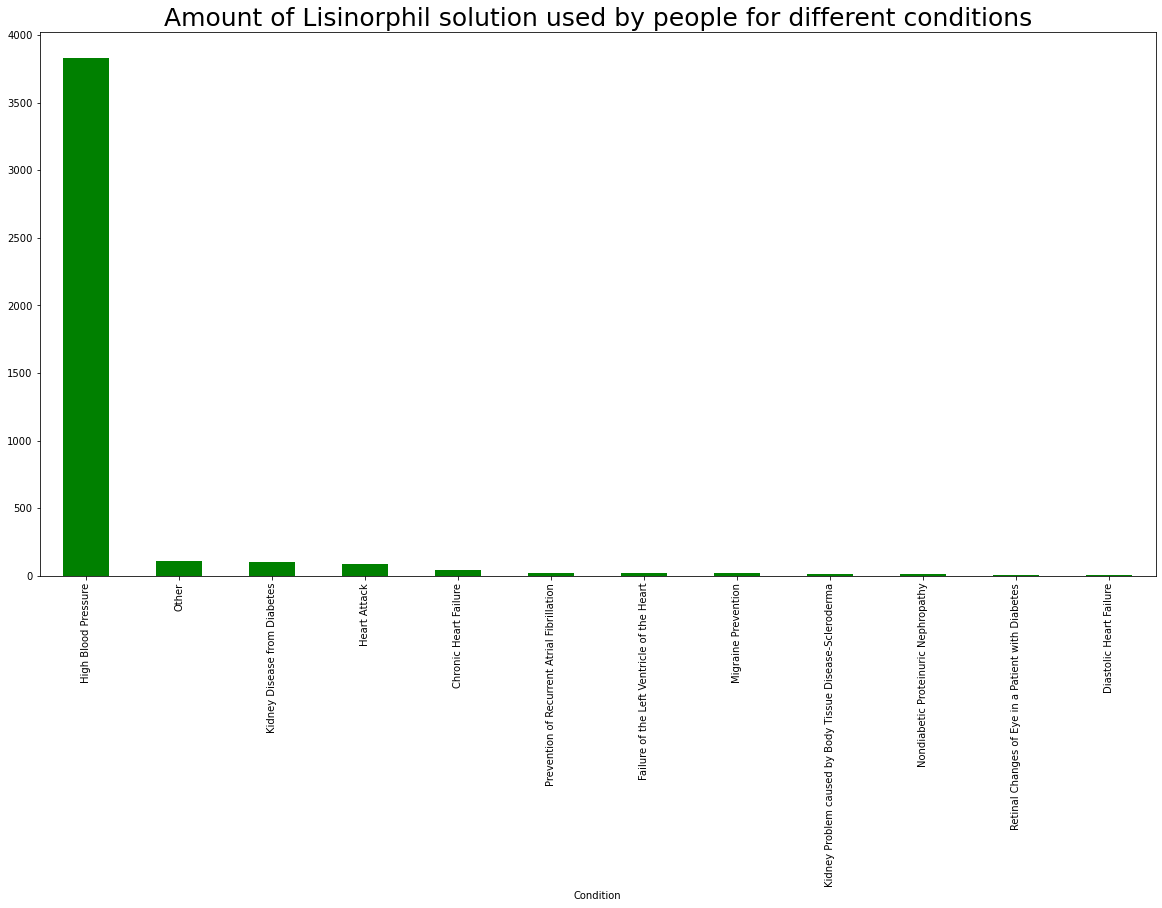

In [142]:
plt.subplots(figsize=(20,10))
df1['Condition'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Amount of Lisinorphil solution used by people for different conditions',fontsize=25)
plt.xlabel('Condition')
plt.show()

It is mainly used for high blood pressure.

In [143]:
df2=df1.groupby('Condition').get_group('High Blood Pressure')

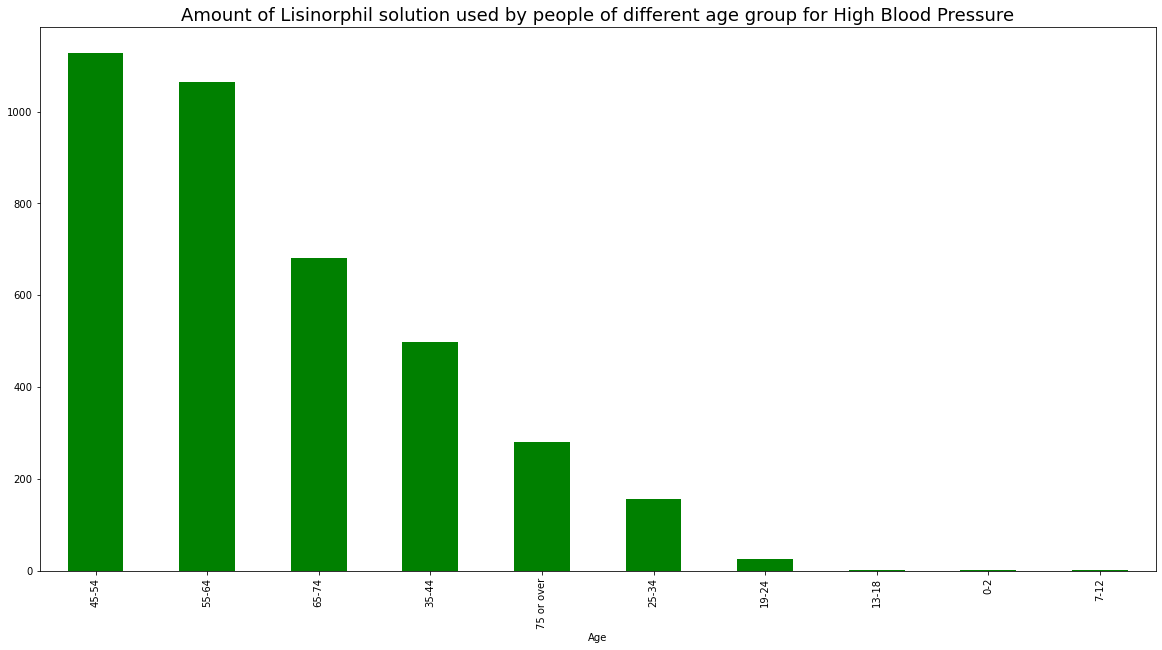

In [144]:
plt.subplots(figsize=(20,10))
df2['Age'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Amount of Lisinorphil solution used by people of different age group for High Blood Pressure',fontsize=18)
plt.xlabel('Age')
plt.show()

Here we can see that it is used as a drug for high blood pressure by all age groups. Among that people of age 45-54 use it more.

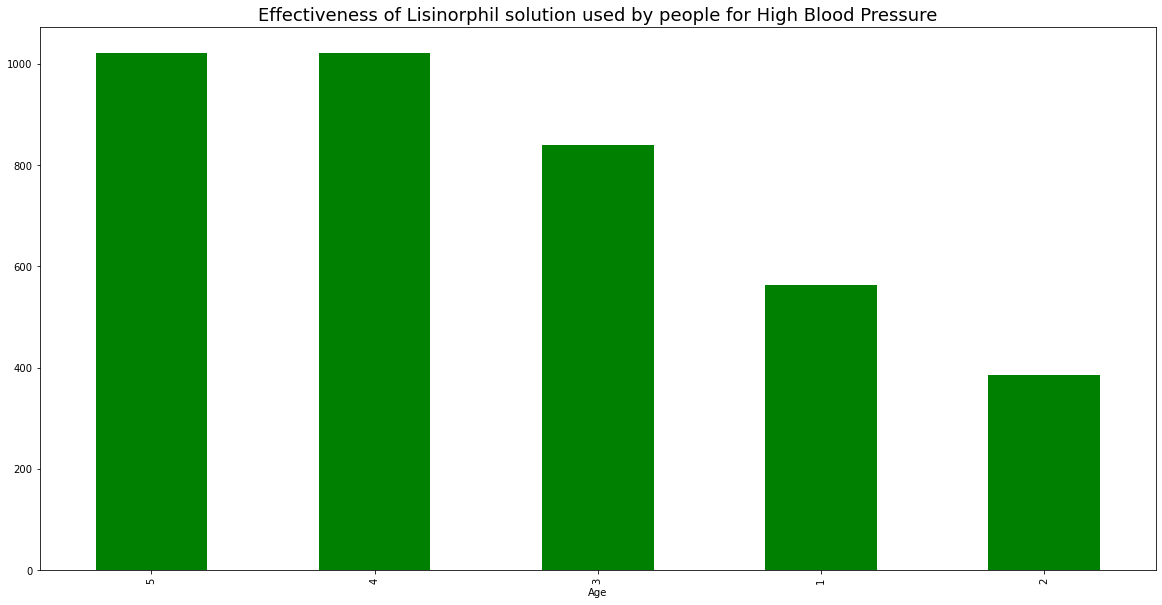

In [145]:
plt.subplots(figsize=(20,10))
df2['Effectiveness'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Effectiveness of Lisinorphil solution used by people for High Blood Pressure',fontsize=18)
plt.xlabel('Age')
plt.show()

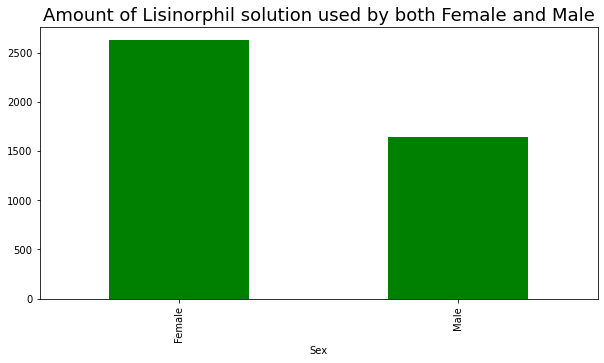

In [146]:
plt.subplots(figsize=(10,5))
df1['Sex'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Amount of Lisinorphil solution used by both Female and Male',fontsize=18)
plt.xlabel('Sex')
plt.show()

It is used more by female

In [147]:
df3=df1.groupby('Sex').get_group('Male')

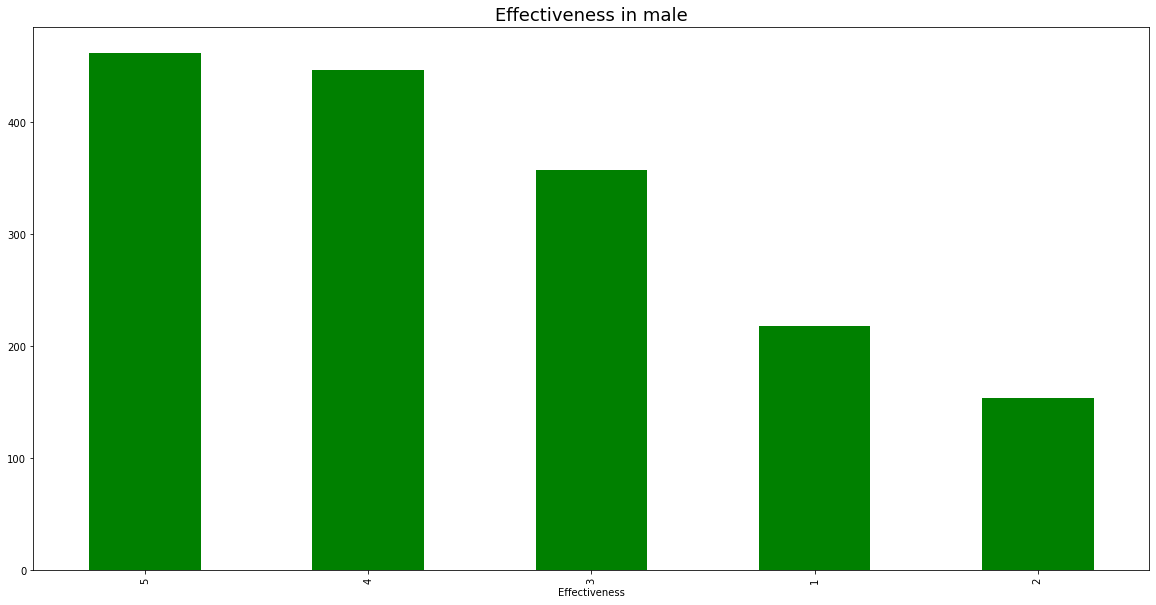

In [148]:
plt.subplots(figsize=(20,10))
df3['Effectiveness'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Effectiveness in male',fontsize=18)
plt.xlabel('Effectiveness')
plt.show()

In [149]:
df4=df1.groupby('Sex').get_group('Female')

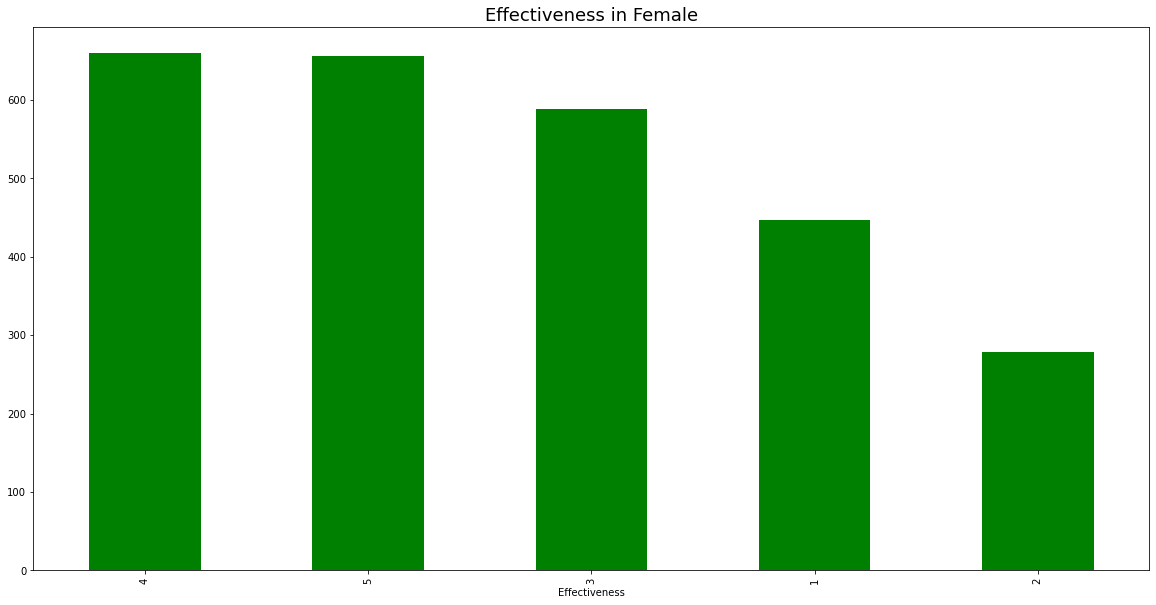

In [150]:
plt.subplots(figsize=(20,10))
df4['Effectiveness'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Effectiveness in Female',fontsize=18)
plt.xlabel('Effectiveness')
plt.show()

# Data Preprocessing

In [151]:
df1.isna().sum()

Age              0
Condition        0
Drug             0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [152]:
df1=df1.drop(['Drug','UsefulCount','Sides'],axis=1)

In [153]:
df1.dtypes

Age              object
Condition        object
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex              object
dtype: object

In [154]:
drug_data=df1.copy()

In [155]:
drug_data=pd.get_dummies(df1)

In [156]:
drug_data.head()

,EaseofUse,Effectiveness,Satisfaction,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,...,Condition_High Blood Pressure,Condition_Kidney Disease from Diabetes,Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma,Condition_Migraine Prevention,Condition_Nondiabetic Proteinuric Nephropathy,Condition_Other,Condition_Prevention of Recurrent Atrial Fibrillation,Condition_Retinal Changes of Eye in a Patient with Diabetes,Sex_Female,Sex_Male
9197,5,5,5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9203,5,4,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9209,4,5,4,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
9215,5,5,5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9221,2,4,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [157]:
drug_data.columns

Index(['EaseofUse', 'Effectiveness', 'Satisfaction', 'Age_0-2', 'Age_13-18',
       'Age_19-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_65-74', 'Age_7-12', 'Age_75 or over',
       'Condition_Chronic Heart Failure', 'Condition_Diastolic Heart Failure',
       'Condition_Failure of the Left Ventricle of the Heart',
       'Condition_Heart Attack', 'Condition_High Blood Pressure',
       'Condition_Kidney Disease from Diabetes',
       'Condition_Kidney Problem caused by Body Tissue Disease-Scleroderma',
       'Condition_Migraine Prevention',
       'Condition_Nondiabetic Proteinuric Nephropathy', 'Condition_Other',
       'Condition_Prevention of Recurrent Atrial Fibrillation',
       'Condition_Retinal Changes of Eye in a Patient with Diabetes',
       'Sex_Female', 'Sex_Male'],
      dtype='object')

# Selecting Target column and feature columns

In [158]:
x=drug_data.drop(['Effectiveness'],axis=1)

In [159]:
y=drug_data['Effectiveness']

# Changing the numeric data in column Effectiveness to categorical

In [160]:
y[y==1]='Extreme side effects'

In [161]:
y[y==2]='Severe Side effects'

In [162]:
y[y==3]='Moderate Side Effects'

In [163]:
y[y==4]='Mild Side Effects'

In [164]:
y[y==5]='No Side Effects'

In [165]:
y.head()

9197      No Side Effects
9203    Mild Side Effects
9209      No Side Effects
9215      No Side Effects
9221    Mild Side Effects
Name: Effectiveness, dtype: object

# Splitting into Train and Test sets 

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [167]:
X_train.shape

(2986, 26)

In [168]:
X_test.shape

(1281, 26)

# Machine Learning Algorithms

# 1. KNN

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pred=Classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [170]:
acc_values

[0.5526932084309133,
 0.5417642466822795,
 0.5448868071818892,
 0.5722092115534738,
 0.5683060109289617,
 0.570647931303669,
 0.5675253708040593,
 0.5612802498048399,
 0.5675253708040593,
 0.5620608899297423,
 0.5683060109289617,
 0.5659640905542545]

Text(0, 0.5, 'accuracy')

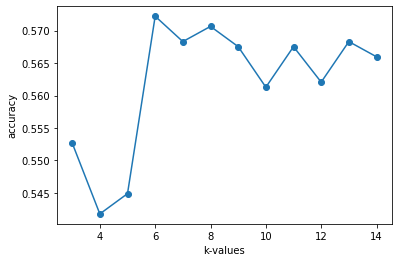

In [171]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

In [172]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score
y_pred1 = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred1))
print('Recall is',recall_score(y_test, y_pred1,average='micro'))
print('Precision is',precision_score(y_test, y_pred1,average='micro'))

[[148  16  16   7  13]
 [ 30 204  37  55   6]
 [ 46  82 120  25  11]
 [ 24  63  18 229   1]
 [ 45  17  29   7  32]]
Accuracy is 0.5722092115534738
Recall is 0.5722092115534738
Precision is 0.5722092115534738


# 2. Random Forest 

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [175]:
y_pred2 = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred2))
print('Recall is',recall_score(y_test, y_pred2,average='micro'))
print('Precision is',precision_score(y_test, y_pred2,average='micro'))

[[127  13  38  12  10]
 [ 22 188  56  57   9]
 [ 36  58 152  22  16]
 [ 17  42  38 237   1]
 [ 33  20  34  10  33]]
Accuracy is 0.5753317720530835
Recall is 0.5753317720530835
Precision is 0.5753317720530835


# 3. Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [177]:
y_pred3 = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred3))
print('Recall is',recall_score(y_test, y_pred3,average='micro'))
print('Precision is',precision_score(y_test, y_pred3,average='micro'))

[[136  15  27   8  14]
 [ 28 199  46  53   6]
 [ 42  71 135  20  16]
 [ 20  42  39 233   1]
 [ 36  24  37   3  30]]
Accuracy is 0.5722092115534738
Recall is 0.5722092115534738
Precision is 0.5722092115534738


# 4. Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [179]:
y_pred4 = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred4))
print('Recall is',recall_score(y_test, y_pred4,average='micro'))
print('Precision is',precision_score(y_test, y_pred4,average='micro'))

[[143  11  23  13  10]
 [ 26 194  61  49   2]
 [ 28  59 156  28  13]
 [ 16  38  35 246   0]
 [ 28  16  40   8  38]]
Accuracy is 0.6065573770491803
Recall is 0.6065573770491803
Precision is 0.6065573770491803


# 5. Naive bayes

In [180]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(X_train,y_train)

GaussianNB()

In [181]:
y_pred5 = gn.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred5))
print('Recall is',recall_score(y_test, y_pred5,average='micro'))
print('Precision is',precision_score(y_test, y_pred5,average='micro'))

[[ 15   2   6   1 176]
 [  2   6   8   5 311]
 [  8   1   5   1 269]
 [  1   2   6  14 312]
 [  2   0   3   1 124]]
Accuracy is 0.12802498048399688
Recall is 0.12802498048399688
Precision is 0.12802498048399688


In [182]:
from sklearn.naive_bayes import BernoulliNB
bn=BernoulliNB()
bn.fit(X_train,y_train)

BernoulliNB()

In [183]:
y_pred6 = bn.predict(X_test)
cm = confusion_matrix(y_test, y_pred6)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred6))
print('Recall is',recall_score(y_test, y_pred6,average='micro'))
print('Precision is',precision_score(y_test, y_pred6,average='micro'))

[[ 21  94   6  79   0]
 [ 11 161  10 150   0]
 [ 18 146   7 113   0]
 [ 10 157  11 156   1]
 [  8  65   4  53   0]]
Accuracy is 0.2693208430913349
Recall is 0.2693208430913349
Precision is 0.2693208430913349


# 6. Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)


LogisticRegression()

In [185]:
y_pred7 = logit_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred7)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred7))
print('Recall is',recall_score(y_test, y_pred7,average='micro'))
print('Precision is',precision_score(y_test, y_pred7,average='micro'))

[[158   3  38   0   1]
 [ 34 127  67 104   0]
 [ 47  81 105  51   0]
 [  3  32  31 269   0]
 [ 58  14  52   6   0]]
Accuracy is 0.5144418423106948
Recall is 0.5144418423106948
Precision is 0.5144418423106948


# 7. SVM

In [186]:
from sklearn.svm import SVC 
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)

SVC()

In [187]:
y_pred8=svm_rbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred8)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred8))
print('Recall is',recall_score(y_test, y_pred8,average='micro'))
print('Precision is',precision_score(y_test, y_pred8,average='micro'))

[[193   1   5   0   1]
 [ 58 133 105  35   1]
 [ 76  21 181   4   2]
 [ 33  31  44 227   0]
 [ 72   3  52   1   2]]
Accuracy is 0.5745511319281811
Recall is 0.5745511319281811
Precision is 0.5745511319281811


# Hyperparameter Tuning

In [188]:
gb=GradientBoostingClassifier(max_depth=3,n_estimators=50,learning_rate=0.1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [189]:
y_pred4 = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred4))
print('Recall is',recall_score(y_test, y_pred4,average='micro'))
print('Precision is',precision_score(y_test, y_pred4,average='micro'))

[[155   9  24   2  10]
 [ 33 195  69  32   3]
 [ 38  59 167   7  13]
 [ 32  38  43 222   0]
 [ 32  16  41   1  40]]
Accuracy is 0.6081186572989852
Recall is 0.6081186572989852
Precision is 0.6081186572989852


In [190]:
gb=GradientBoostingClassifier(max_depth=3,n_estimators=40,learning_rate=0.1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=40)

In [191]:
y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred))
print('Recall is',recall_score(y_test, y_pred,average='micro'))
print('Precision is',precision_score(y_test, y_pred,average='micro'))

[[149  16  24   1  10]
 [ 27 203  68  31   3]
 [ 35  63 167   6  13]
 [ 32  36  45 222   0]
 [ 30  21  38   1  40]]
Accuracy is 0.60967993754879
Recall is 0.60967993754879
Precision is 0.60967993754879


In [194]:
gb=GradientBoostingClassifier(max_depth=3,n_estimators=42,learning_rate=0.1)
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=42)

In [195]:
y_predd = gb.predict(X_test)
cm = confusion_matrix(y_test, y_predd)
print(cm)
print('Accuracy is',accuracy_score(y_test, y_predd))
print('Recall is',recall_score(y_test, y_predd,average='micro'))
print('Precision is',precision_score(y_test, y_predd,average='micro'))

[[150  14  24   2  10]
 [ 27 203  67  32   3]
 [ 34  63 167   7  13]
 [ 32  36  45 222   0]
 [ 30  21  38   1  40]]
Accuracy is 0.6104605776736924
Recall is 0.6104605776736924
Precision is 0.6104605776736924


# Conclusion

The best algorithm to fit the model is Gradient Boosting Algorithm. The algorithm classifies the side effects of drug based on age,sex,ease of use, satisfication.